# Оптимизация управления персоналом для HR-аналитиков компании «Работа с заботой»

Проект выполняется для HR-аналитиков компании «Работа с заботой» в связи с задачей избежать финансовых потерь и оттока сотрудников, для решения этой проблемы было поставлено две задачи - предсказать удовлетворенность сотрудников и вероятность их увольнения.

**Цель исследования:**  построить модели, предсказывающие уровень удовлетворённости сотрудника и вероятность его увольнения на основе данных компании для предотвращения проблемы оттока сотрудников и неожиданного увольнения.

**Ход исследования:** Данные загружаются из датасетов: ```train_job_satisfaction_rate.csv```, ```test_features.csv```, ```test_target_job_satisfaction_rate.csv```, ```train_quit.csv```, ```test_target_quit.csv```. Поскольку качество данных неизвестно, сначала необходимо их изучить. В случае обнаружения ошибок и их влияния на исследование на этапе предобработки данных будет рассмотрены варианты исправления ошибок без искажения конечных результатов. В ходе исследовательского и корреляционного анализа будут выявленные наиболее важные особенности данных, которые помогут с принятием решения об определении необходимых входных признаков и преобразовании данных для обучения наиболее точной модели. В итоге будут выбраны несколько вариантов моделей с различными гиперпараметрами, метрики помогут определить наиболее точную из них. На основе полученных данных будут сделаны предсказания.

<u>Таким образом, исследование пройдет в 2 этапа, в каждом из которых будут предприняты следующие шаги:</u>
- Загрузка данных
- Обзор данных
- Предобработка данных
- Исследовательский и корреляционный анализ данных
- Подготовка данных и поиск наилучшей модели
- Итоговый вывод


**Описание данных:**
Компания предоставила данные с характеристиками сотрудников компании. Уровень удовлетворенности получили из форм обратной связи (теста-опросника), по которому 0 — совершенно неудовлетворён, 1 — полностью удовлетвоён.

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.
- quit - указание на то, уволился ли сотрудник

## Загрузка данных

In [1]:
!pip install phik -q 
!pip install matplotlib==3.7.2 scipy==1.9.3
!pip install numpy==1.24.4
!pip install --upgrade numba
!pip install -U scikit-learn

     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.3/38.1 MB ? eta -:--:--
     - -------------------------------------- 1.3/38.1 MB 8.4 MB/s eta 0:00:05
     ---- ----------------------------------- 3.9/38.1 MB 9.0 MB/s eta 0:00:04
     ------ --------------------------------- 6.0/38.1 MB 9.0 MB/s eta 0:00:04
     ------- -------------------------------- 7.6/38.1 MB 8.4 MB/s eta 0:00:04
     -------- ------------------------------- 8.4/38.1 MB 7.8 MB/s eta 0:00:04
     --------- ------------------------------ 9.4/38.1 MB 7.2 MB/s eta 0:00:05
     ---------- ----------------------------- 10.2/38.1 MB 6.7 MB/s eta 0:00:05
     ----------- ---------------------------- 10.7/38.1 MB 6.2 MB/s eta 0:00:05
     ----------- ---------------------------- 11.3/38.1 MB 5.9 MB/s eta 0:00:05
     ------------ --------------------------- 11.8/38.1 MB 5.6 MB/s eta 0:00:05
     ------------ --------------------------- 12.3/38.1 MB 5.2

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + meson setup C:\Users\79104\AppData\Local\Temp\pip-install-7km7qzkj\scipy_78161a637349448984e586d4756b8f57 C:\Users\79104\AppData\Local\Temp\pip-install-7km7qzkj\scipy_78161a637349448984e586d4756b8f57\.mesonpy-oyj479fr -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\79104\AppData\Local\Temp\pip-install-7km7qzkj\scipy_78161a637349448984e586d4756b8f57\.mesonpy-oyj479fr\meson-python-native-file.ini
  The Meson build system
  Version: 1.8.0
  Source dir: C:\Users\79104\AppData\Local\Temp\pip-install-7km7qzkj\scipy_78161a637349448984e586d4756b8f57
  Build dir: C:\Users\79104\AppData\Local\Temp\pip-install-7km7qzkj\scipy_78161a637349448984e586d4756b8f57\.mesonpy-oyj479fr
  Build type: native build
  Project name: SciPy
  Project version: 1.9.3
  
  ..\meson.build:1:0: ERROR: Unknown compiler(s): [['icl'], ['cl'], ['

     ------------------------------ ------- 33.6/42.1 MB 908.5 kB/s eta 0:00:10
     ------------------------------ ------- 34.1/42.1 MB 917.5 kB/s eta 0:00:09
     ------------------------------- ------ 34.3/42.1 MB 932.5 kB/s eta 0:00:09
     ------------------------------- ------ 34.9/42.1 MB 941.4 kB/s eta 0:00:08
     ------------------------------- ------ 35.1/42.1 MB 945.7 kB/s eta 0:00:08
     ------------------------------- ------ 35.4/42.1 MB 955.7 kB/s eta 0:00:07
     -------------------------------- ----- 35.7/42.1 MB 956.0 kB/s eta 0:00:07
     -------------------------------- ----- 35.9/42.1 MB 961.5 kB/s eta 0:00:07
     -------------------------------- ----- 36.2/42.1 MB 962.7 kB/s eta 0:00:07
     -------------------------------- ----- 36.4/42.1 MB 967.2 kB/s eta 0:00:06
     --------------------------------- ---- 36.7/42.1 MB 974.4 kB/s eta 0:00:06
     --------------------------------- ---- 37.0/42.1 MB 976.0 kB/s eta 0:00:06
     --------------------------------- -

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\79104\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\79104\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\79104\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\79104\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------------------ --------------------- 1.3/2.8 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   - -------------------------------------- 1.3/30.3 MB 13.4 MB/s eta 0:00:03
   ----- ---------------------------------- 3.9/30.3 MB 9.8 MB/s eta 0:00:03
   ------- -------------------------------- 5.8/30.3 MB 8.8 MB/s eta 0:00:03
   --------- ------------------------------ 7.3/30.3 MB 8.5 MB/s eta 0:00:03
   ------------ --------------------------- 9.2/30.3 MB 8.5 MB/s eta 0:00:03
   -------------- ------------------------- 10.7/30.3 MB 8.4 MB/s eta 0:00:03
   ---------------- ----------------------- 12.6/30.3 MB 8.3 MB/s eta 0:00:03
   ------------------ --------------------- 13.9/30.3 MB 8.1 MB/s eta 0:00:03
   -----------------

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, f_classif, f_regression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler


from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import phik

In [3]:
try:
    train_sat = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_feat = pd.read_csv('/datasets/test_features.csv')
    y_test_sat = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
    
    train_quit = pd.read_csv('train_quit.csv')
    y_test_quit = pd.read_csv('test_target_quit.csv')

except:
    train_sat = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    test_feat = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    y_test_sat = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
    
    train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    y_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

Мы загрузили все файли для обеих задач, далее рассмотрим первый набор данных для первой задачи. 

## Задача 1: предсказание удовлетворенности сотрудников

### Обзор данных 

In [4]:
#создадим функцию для вывода основной информации по датафреймам
def general_info(df):
    display(df.head(10))
    display(df.info())
    display(df.nunique())

In [5]:
general_info(train_sat)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

id                       4000
dept                        5
level                       3
workload                    3
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     68
job_satisfaction_rate      98
dtype: int64

In [6]:
general_info(test_feat)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

id                       2000
dept                        6
level                       3
workload                    4
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     66
dtype: int64

In [7]:
general_info(y_test_sat)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

id                       2000
job_satisfaction_rate      98
dtype: int64

**Выводы:**
- В датасетах есть пропуски - 10 шт в датасете `train_sat` и 3 шт в датасете `test_feat`, их мы обработаем в пайплайне
- Необходимо проверить наличие явных дубликатов, а также возможных опечаток в категориальных данных, так в колонках dept и workload, так как в тренировочной и тестовой выборках разное количество уникальных значений
- Названия столбцов приведены к норме, нет необходимости их редактировать
- Тип данных last_year_promo и last_year_violations оставим категориальным, поскольку будем его кодировать в пайплайне и нет смысла менять его сейчас на булевый тип данных, так тип данных колонок также в норме

- Обратим внимание, что индекс и id в тестовой выборке не совпадает, необходимо будет соотнести значение тестовых входящих признаков и целевого признака по id для обеспечения правильного соответствия уровня удовлетворенности правильному id.

### Предобработка данных

In [8]:
print(train_sat.duplicated().sum())
print(test_feat.duplicated().sum())
y_test_sat.duplicated().sum()

0
0


0

In [9]:
print(train_sat.dept.unique())
test_feat.dept.unique()

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]


array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [10]:
print(train_sat.workload.unique())
test_feat.workload.unique()

['medium' 'high' 'low']


array(['medium', 'low', 'high', ' '], dtype=object)

In [11]:
test_feat['dept'] = test_feat['dept'].apply(lambda x: np.nan if x==' ' else x)
print(test_feat.dept.unique())

test_feat['workload'] = test_feat['workload'].apply(lambda x: np.nan if x==' ' else x)
test_feat.workload.unique()

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]


array(['medium', 'low', 'high', nan], dtype=object)

In [12]:
test_feat.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [13]:
test_sat = test_feat.set_index('id').join(y_test_sat.set_index('id'), on='id')
test_sat['id'] = test_sat.index
test_sat.index = range(0, 2000)
test_sat

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,id
0,marketing,junior,medium,2,no,no,5,28800,0.79,485046
1,hr,junior,medium,1,no,no,4,30000,0.72,686555
2,sales,middle,low,5,no,no,4,19200,0.64,467458
3,sales,middle,low,6,no,no,4,19200,0.60,418655
4,hr,middle,medium,5,no,no,5,40800,0.75,789145
...,...,...,...,...,...,...,...,...,...,...
1995,marketing,junior,low,3,no,no,3,20400,0.56,393147
1996,technology,middle,low,3,no,no,2,21600,0.14,109582
1997,technology,junior,low,1,no,no,3,14400,0.11,305653
1998,technology,middle,low,8,no,no,1,32400,0.43,160233


In [14]:
y_test_sat = pd.DataFrame(test_sat[['id', 'job_satisfaction_rate']])
y_test_sat

,id,job_satisfaction_rate
0,485046,0.79
1,686555,0.72
2,467458,0.64
3,418655,0.60
4,789145,0.75
...,...,...
1995,393147,0.56
1996,109582,0.14
1997,305653,0.11
1998,160233,0.43


In [15]:
test_feat = test_sat.drop('job_satisfaction_rate', axis=1)
test_feat

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,id
0,marketing,junior,medium,2,no,no,5,28800,485046
1,hr,junior,medium,1,no,no,4,30000,686555
2,sales,middle,low,5,no,no,4,19200,467458
3,sales,middle,low,6,no,no,4,19200,418655
4,hr,middle,medium,5,no,no,5,40800,789145
...,...,...,...,...,...,...,...,...,...
1995,marketing,junior,low,3,no,no,3,20400,393147
1996,technology,middle,low,3,no,no,2,21600,109582
1997,technology,junior,low,1,no,no,3,14400,305653
1998,technology,middle,low,8,no,no,1,32400,160233


**Выводы:**
- В датасетах были обнаружены неявные пропуски в колонках dept и workload - они были заменены на значения nan, чтобы в дальнейшем можно было обработать их в пайплайне
- Количество пропусков в датасете `test_feat` увеличилось с 3 до 5

### Исследовательский и корреляционный анализ

In [16]:
train_sat['job_satisfaction_rate'].describe()

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

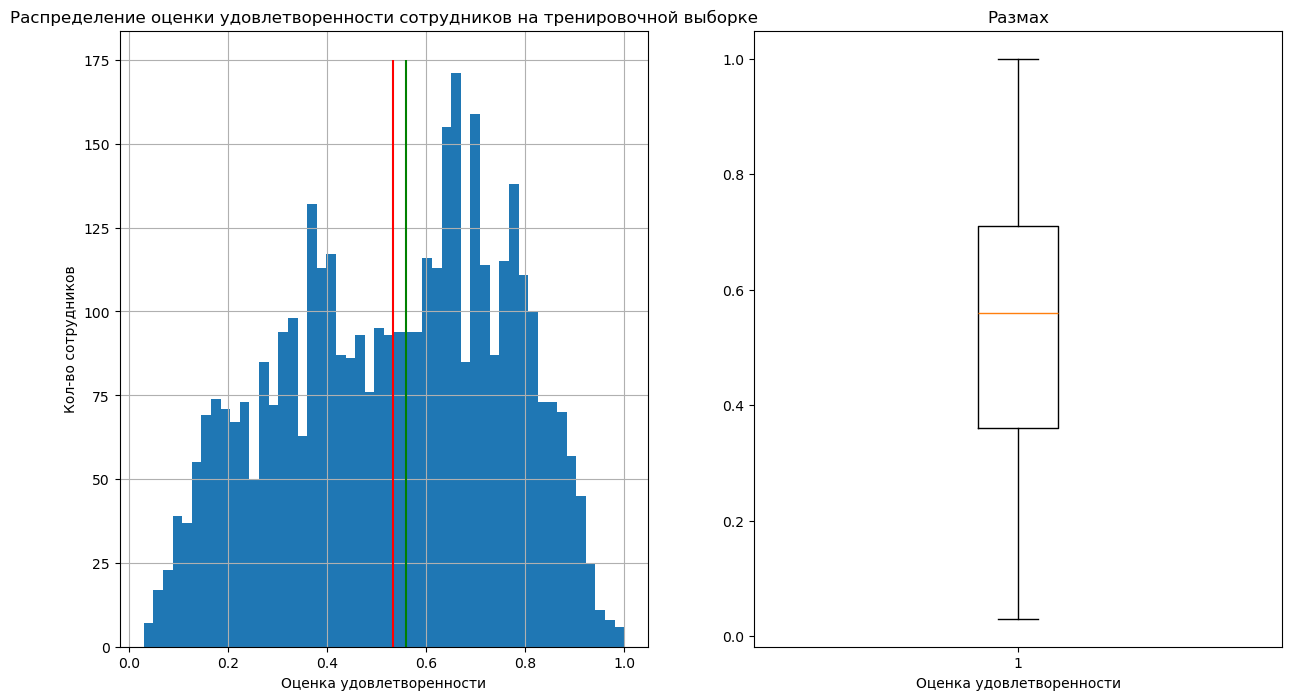

In [17]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(train_sat['job_satisfaction_rate'], bins=50)
ax[0].vlines(train_sat['job_satisfaction_rate'].mean(), ymin=0, ymax=175, color='red', label='среднее')
ax[0].vlines(train_sat['job_satisfaction_rate'].median(), ymin=0, ymax=175, color='green', label='медиана')
ax[0].set_xlabel('Оценка удовлетворенности')
ax[0].set_ylabel('Кол-во сотрудников')
ax[0].set_title('Распределение оценки удовлетворенности сотрудников на тренировочной выборке')
ax[0].grid()

ax[1].boxplot(train_sat['job_satisfaction_rate'])
ax[1].set_xlabel('Оценка удовлетворенности')
ax[1].set_title('Размах')
plt.show()

In [18]:
y_test_sat['job_satisfaction_rate'].describe()

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

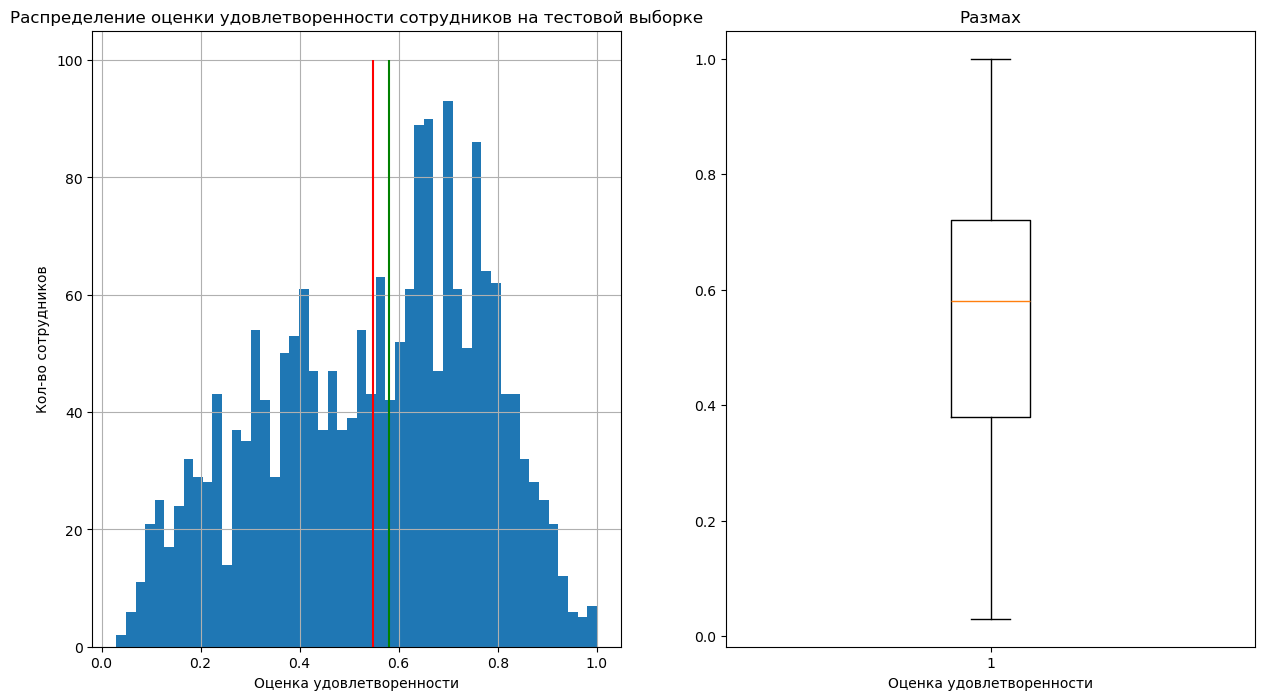

In [19]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(y_test_sat['job_satisfaction_rate'], bins=50)
ax[0].vlines(y_test_sat['job_satisfaction_rate'].mean(), ymin=0, ymax=100, color='red', label='среднее')
ax[0].vlines(y_test_sat['job_satisfaction_rate'].median(), ymin=0, ymax=100, color='green', label='медиана')
ax[0].set_xlabel('Оценка удовлетворенности')
ax[0].set_ylabel('Кол-во сотрудников')
ax[0].set_title('Распределение оценки удовлетворенности сотрудников на тестовой выборке')
ax[0].grid()

ax[1].boxplot(y_test_sat['job_satisfaction_rate'])
ax[1].set_xlabel('Оценка удовлетворенности')
ax[1].set_title('Размах')
plt.show()

Распределение тренировочной и тестовой выборок аналогичны: медиана и среднее значение превышает половину, есть смещение пика вправо, с наиболее частым значением 0.7. Распределение нормально, выбросов нет. Есть интересные значение практически равные 0, то есть сотрудники, которые были совсем не довольны работой. 

Посмотрим на другое непрерывное значение в данном наборе признаков - на зарплату, а затем на распределение дискретных и категориальных признаков. 

In [20]:
train_sat['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

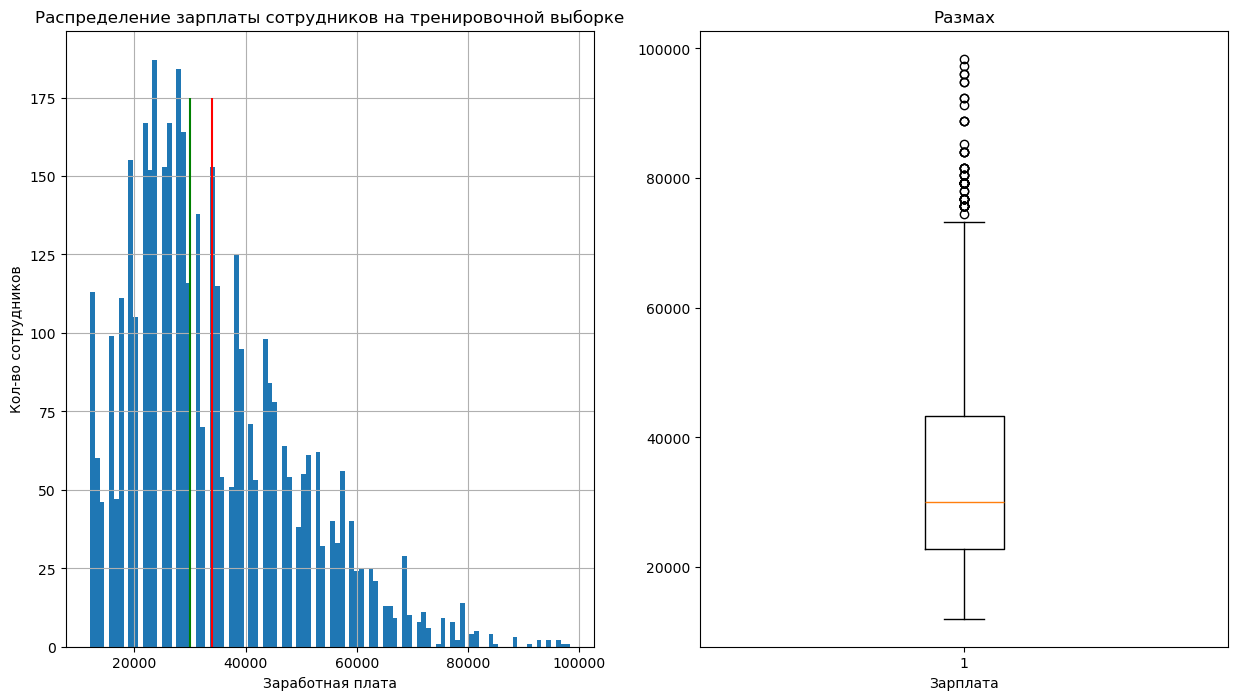

In [21]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(train_sat['salary'], bins=100)
ax[0].vlines(train_sat['salary'].mean(), ymin=0, ymax=175, color='red', label='среднее')
ax[0].vlines(train_sat['salary'].median(), ymin=0, ymax=175, color='green', label='медиана')
ax[0].set_xlabel('Заработная плата')
ax[0].set_ylabel('Кол-во сотрудников')
ax[0].set_title('Распределение зарплаты сотрудников на тренировочной выборке')
ax[0].grid()

ax[1].boxplot(train_sat['salary'])
ax[1].set_xlabel('Зарплата')
ax[1].set_title('Размах')
plt.show()

In [22]:
test_feat['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

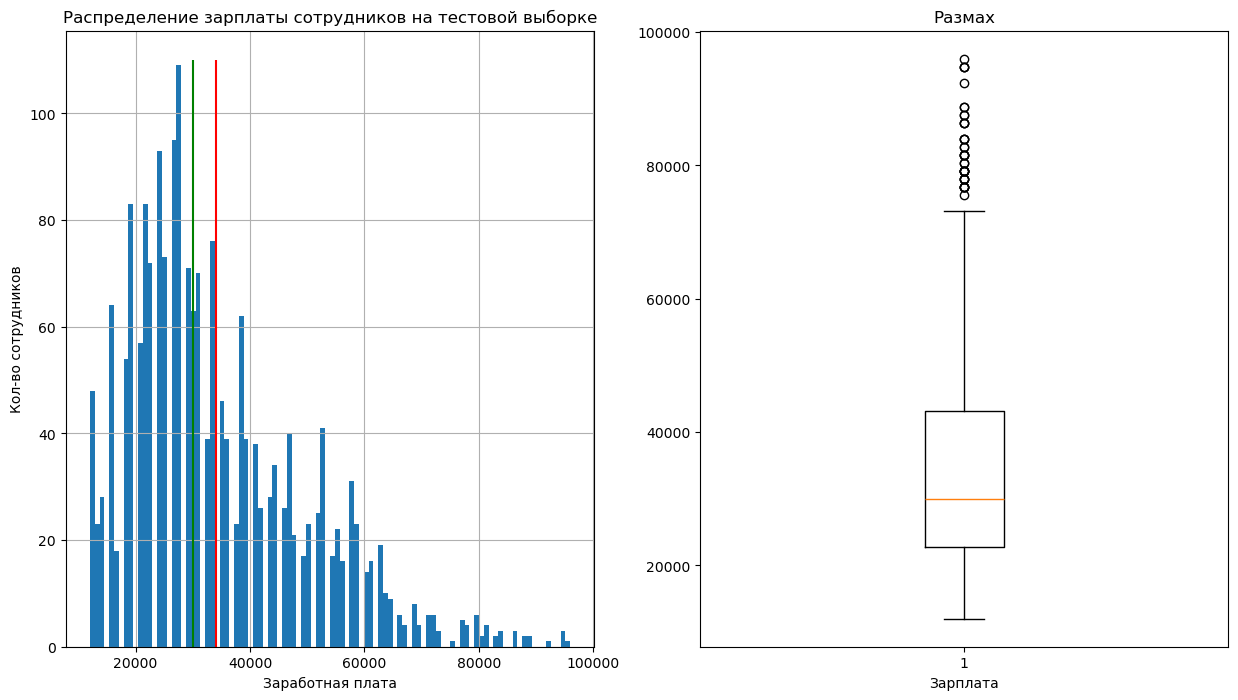

In [23]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(test_feat['salary'], bins=100)
ax[0].vlines(test_feat['salary'].mean(), ymin=0, ymax=110, color='red', label='среднее')
ax[0].vlines(test_feat['salary'].median(), ymin=0, ymax=110, color='green', label='медиана')
ax[0].set_xlabel('Заработная плата')
ax[0].set_ylabel('Кол-во сотрудников')
ax[0].set_title('Распределение зарплаты сотрудников на тестовой выборке')
ax[0].grid()

ax[1].boxplot(test_feat['salary'])
ax[1].set_xlabel('Зарплата')
ax[1].set_title('Размах')
plt.show()

Распределение зарплаты неравномерно, значительно больше сотрудников получают маленькую зарплату, тогда как аболютное меньшинство получает высокую зарплату. Выбросами считается заработная плата прмиерно от 70.000 рублей.  

Text(0.5, 1.0, 'Удовлетворенность сотрудника в зависимости от зп и отдела')

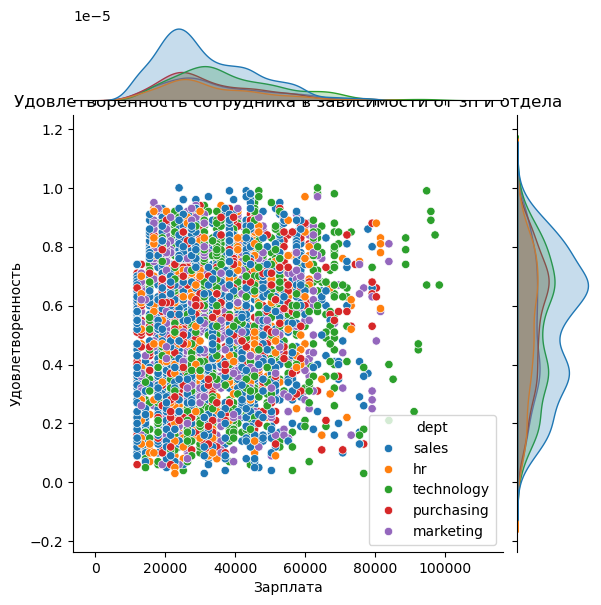

In [24]:
g = sns.jointplot(data = train_sat, x='salary', y='job_satisfaction_rate', hue='dept')
g.ax_joint.set_xlabel('Зарплата')
g.ax_joint.set_ylabel('Удовлетворенность')
g.ax_joint.set_title('Удовлетворенность сотрудника в зависимости от зп и отдела')

Пока тут можно выделить только, что наиболее высокооплачиваемые сотркдники - из технологического отдела. Другие закономрности сложно выявить по данной диаграмме.

In [25]:
train_sat.dept.value_counts(1).round(2)

dept
sales         0.38
technology    0.22
purchasing    0.15
marketing     0.14
hr            0.11
Name: proportion, dtype: float64

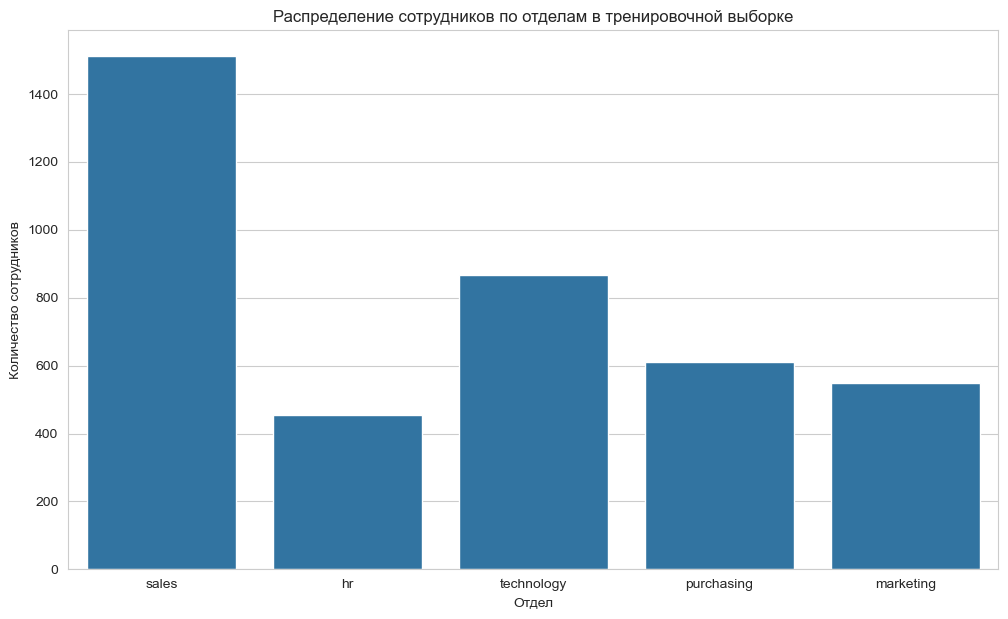

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'dept')
plt.title('Распределение сотрудников по отделам в тренировочной выборке')
a.set_xlabel('Отдел')
a.set_ylabel('Количество сотрудников');

In [27]:
test_feat.dept.value_counts(1).round(2)

dept
sales         0.38
technology    0.23
marketing     0.14
purchasing    0.14
hr            0.11
Name: proportion, dtype: float64

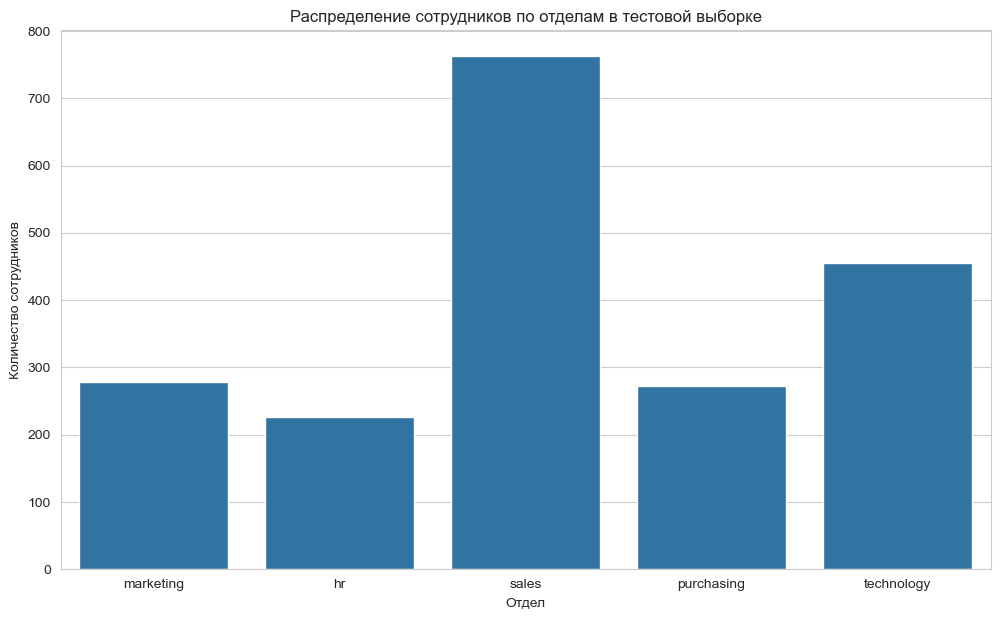

In [28]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'dept')
plt.title('Распределение сотрудников по отделам в тестовой выборке')
a.set_xlabel('Отдел')
a.set_ylabel('Количество сотрудников');

Соотношение в тренировочной и тестовой выборке примерно одинаковое. Наиболее многочисленный отдел продаж, за ним следует технический отдел, наименее - отдел кадров. В отделе маркетинга и закупок примерно равная доля сотрудников. 

In [29]:
train_sat.workload.value_counts(1).round(2)

workload
medium    0.52
low       0.30
high      0.18
Name: proportion, dtype: float64

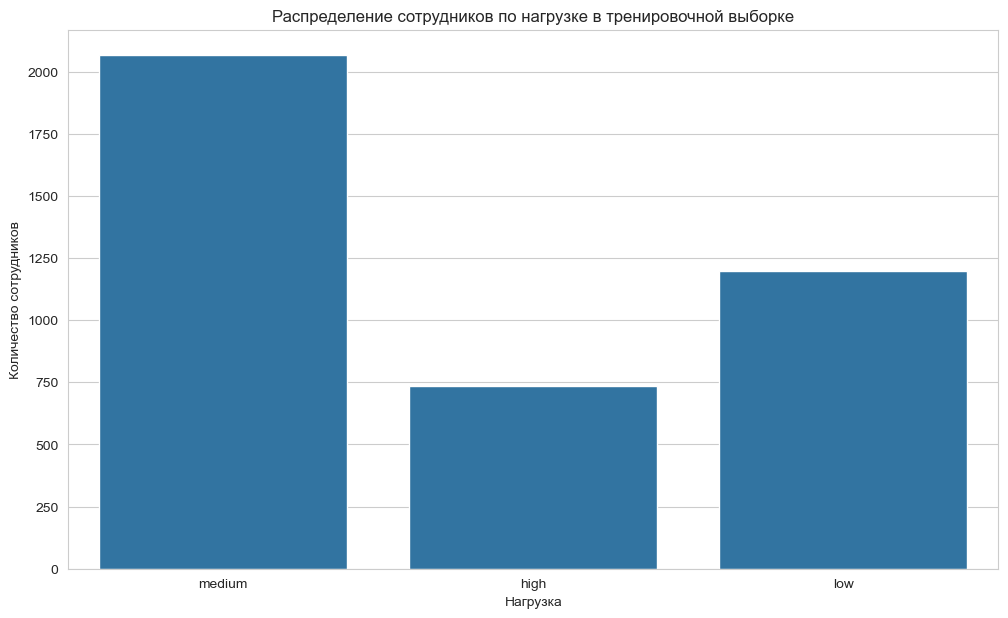

In [30]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'workload')
plt.title('Распределение сотрудников по нагрузке в тренировочной выборке')
a.set_xlabel('Нагрузка')
a.set_ylabel('Количество сотрудников');

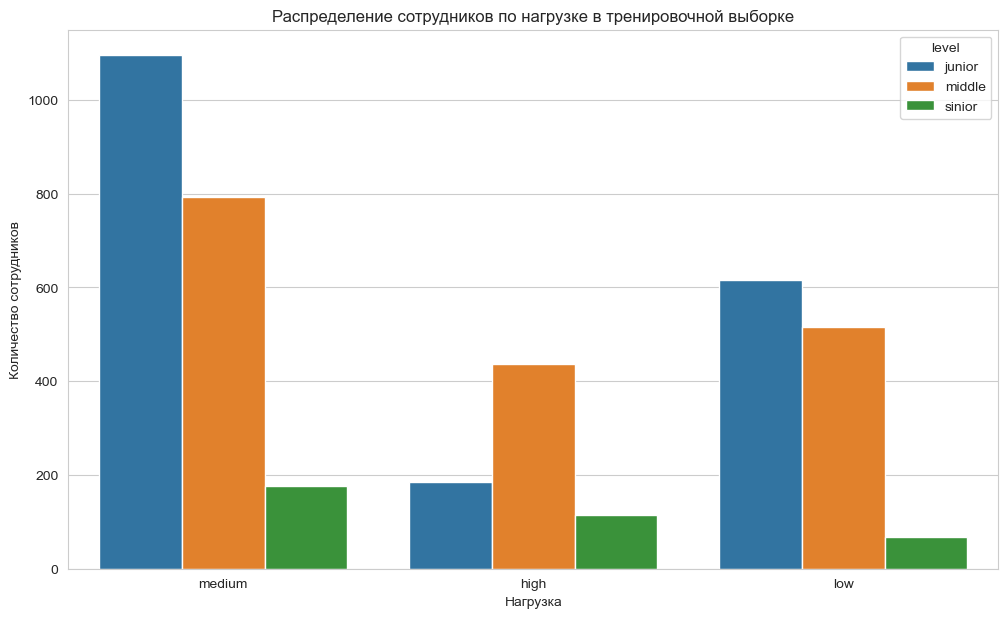

In [31]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'workload', hue='level')
plt.title('Распределение сотрудников по нагрузке в тренировочной выборке')
a.set_xlabel('Нагрузка')
a.set_ylabel('Количество сотрудников');

In [32]:
test_feat.workload.value_counts(1).round(2)

workload
medium    0.52
low       0.30
high      0.18
Name: proportion, dtype: float64

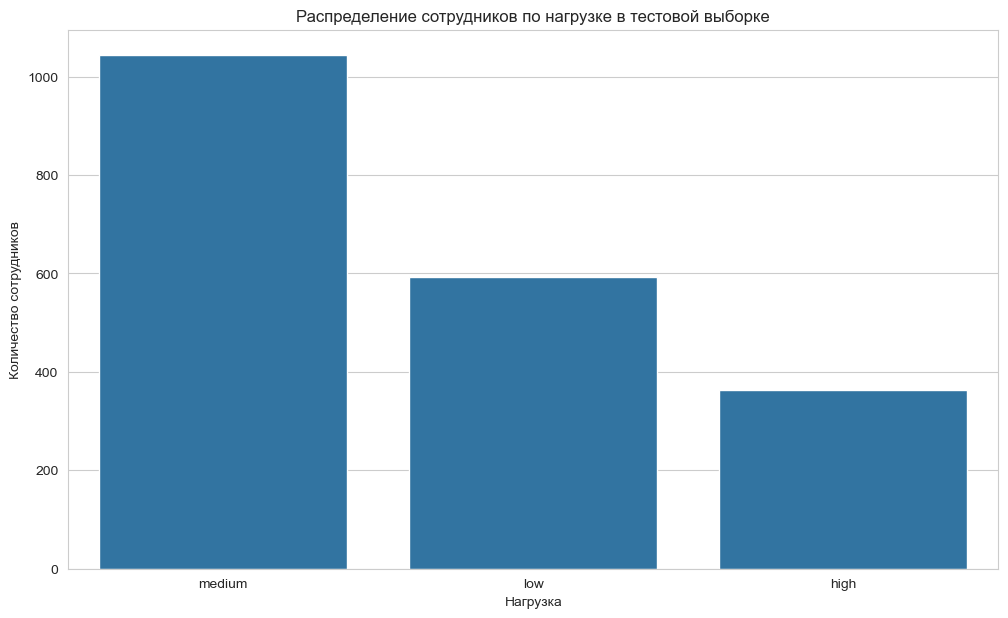

In [33]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'workload')
plt.title('Распределение сотрудников по нагрузке в тестовой выборке')
a.set_xlabel('Нагрузка')
a.set_ylabel('Количество сотрудников');

Распределение равномерно, у большинства сотрудников средняя нагрузка, тогда как у практически у 20% высокая. 

In [34]:
train_sat.level.value_counts(1).round(2)

level
junior    0.47
middle    0.44
sinior    0.09
Name: proportion, dtype: float64

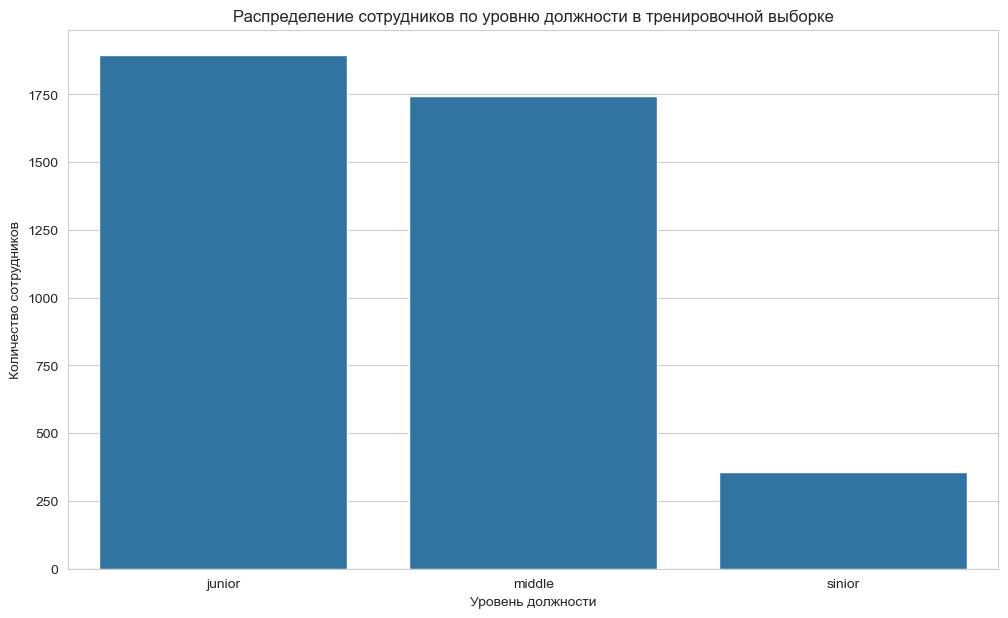

In [35]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'level')
plt.title('Распределение сотрудников по уровню должности в тренировочной выборке')
a.set_xlabel('Уровень должности')
a.set_ylabel('Количество сотрудников');

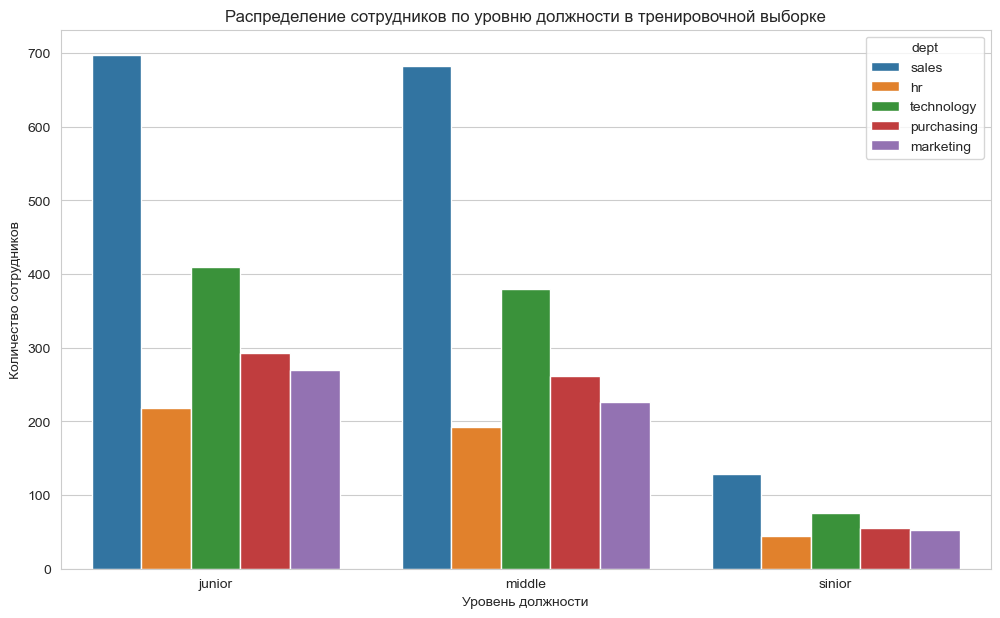

In [36]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'level', hue='dept')
plt.title('Распределение сотрудников по уровню должности в тренировочной выборке')
a.set_xlabel('Уровень должности')
a.set_ylabel('Количество сотрудников');

In [37]:
test_feat.level.value_counts(1).round(2)

level
junior    0.49
middle    0.43
sinior    0.09
Name: proportion, dtype: float64

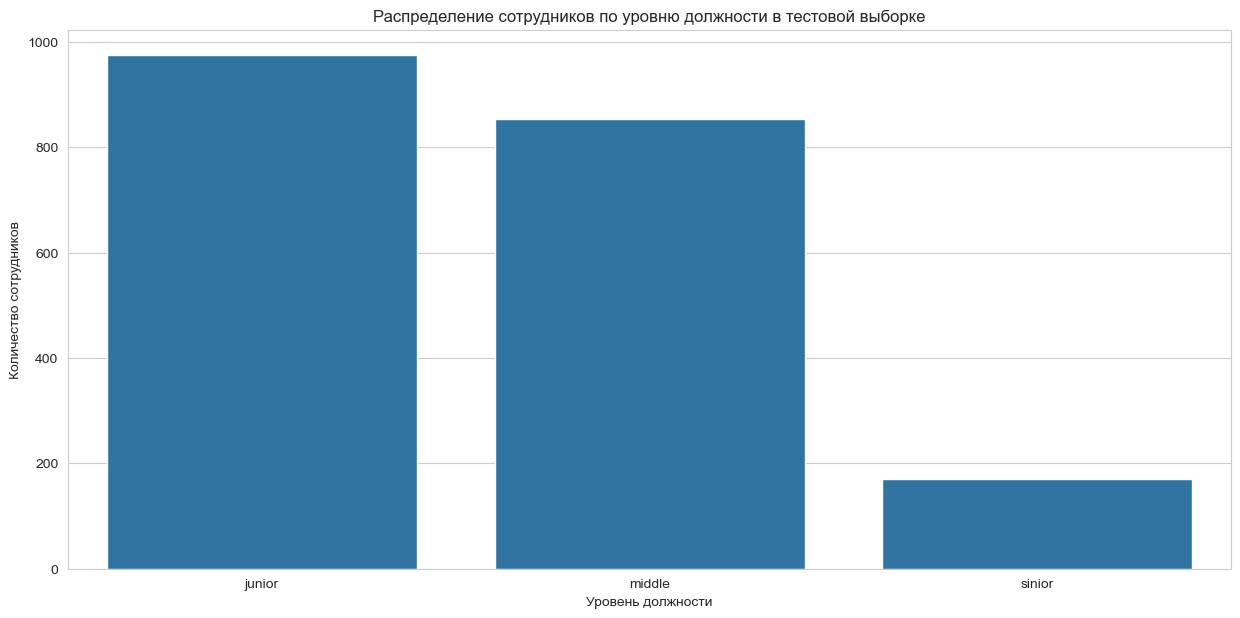

In [38]:
plt.figure(figsize=(15,7))
a = sns.countplot(data = test_feat, x = 'level')
plt.title('Распределение сотрудников по уровню должности в тестовой выборке')
a.set_xlabel('Уровень должности')
a.set_ylabel('Количество сотрудников');

Распределение примерно одинаковое, аболютное большинство сотрудников джуны или миддлы с незначительным перевесом в сторону джунов, синьоров менее 10%.

In [39]:
train_sat.employment_years.value_counts(1).round(2)

employment_years
1     0.24
2     0.20
3     0.12
4     0.10
5     0.10
7     0.08
6     0.07
8     0.05
9     0.03
10    0.02
Name: proportion, dtype: float64

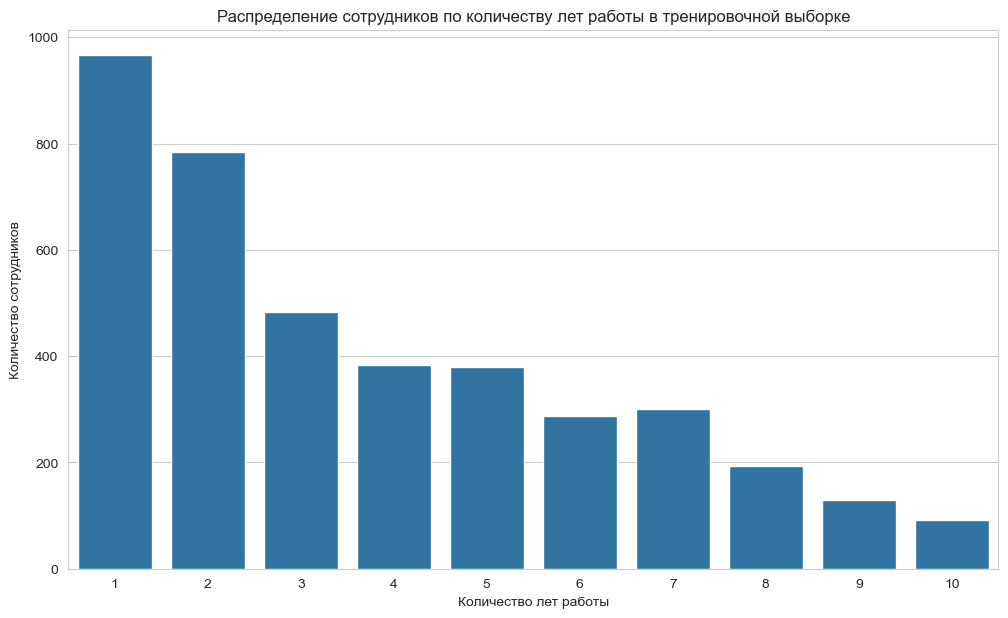

In [40]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'employment_years')
plt.title('Распределение сотрудников по количеству лет работы в тренировочной выборке')
a.set_xlabel('Количество лет работы')
a.set_ylabel('Количество сотрудников');

In [41]:
test_feat.employment_years.value_counts(1).round(2)

employment_years
1     0.26
2     0.19
3     0.12
4     0.09
5     0.09
7     0.09
6     0.07
8     0.05
9     0.03
10    0.02
Name: proportion, dtype: float64

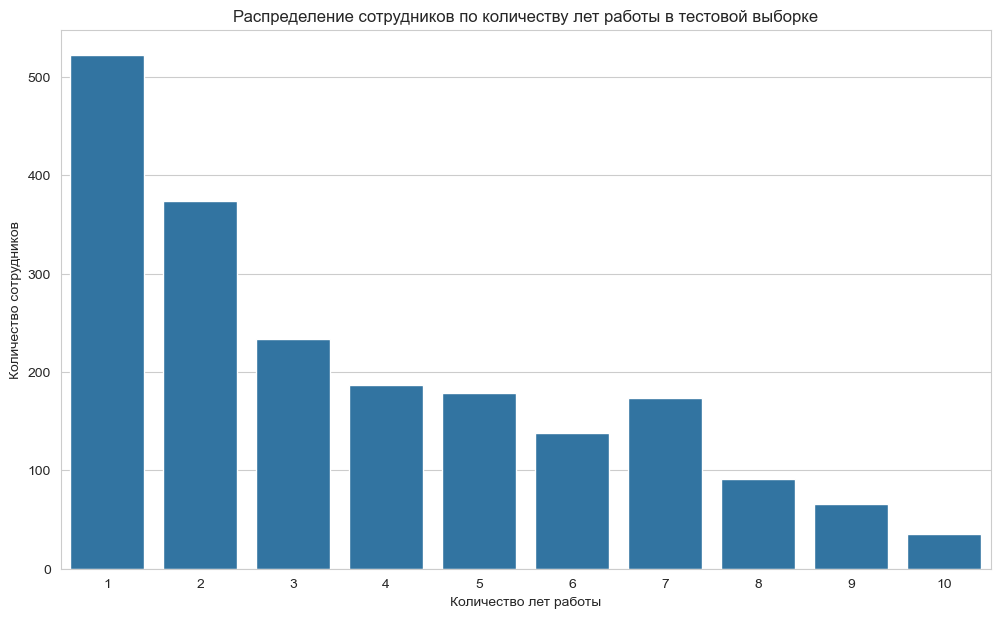

In [42]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'employment_years')
plt.title('Распределение сотрудников по количеству лет работы в тестовой выборке')
a.set_xlabel('Количество лет работы')
a.set_ylabel('Количество сотрудников');

Распределение в тренировочной и тестовой выборке равномерно, больше сотрудников работает меньшее количество лет (1-2 года), более редкие сотрудники - те, которые работают более 7 лет в компании.

In [43]:
train_sat.last_year_promo.value_counts(1).round(2)

last_year_promo
no     0.97
yes    0.03
Name: proportion, dtype: float64

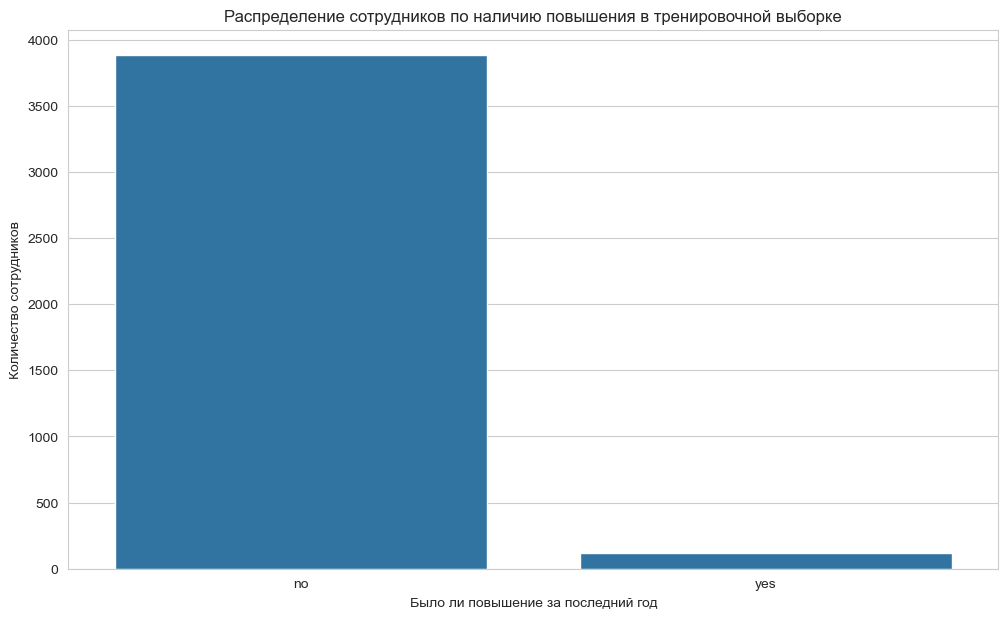

In [44]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'last_year_promo')
plt.title('Распределение сотрудников по наличию повышения в тренировочной выборке')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

In [45]:
test_feat.last_year_promo.value_counts(1).round(2)

last_year_promo
no     0.97
yes    0.03
Name: proportion, dtype: float64

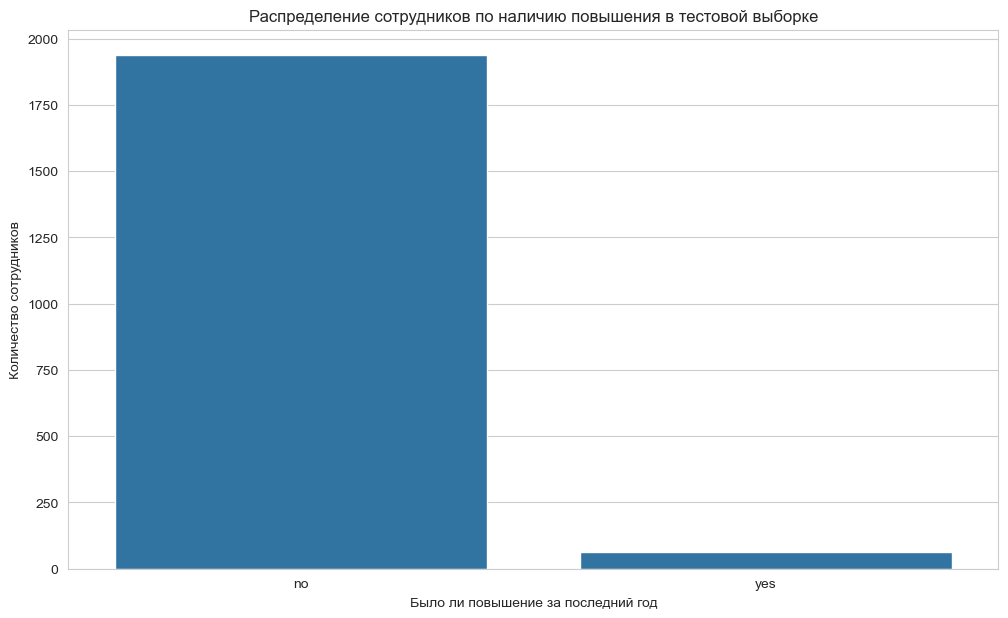

In [46]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'last_year_promo')
plt.title('Распределение сотрудников по наличию повышения в тестовой выборке')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

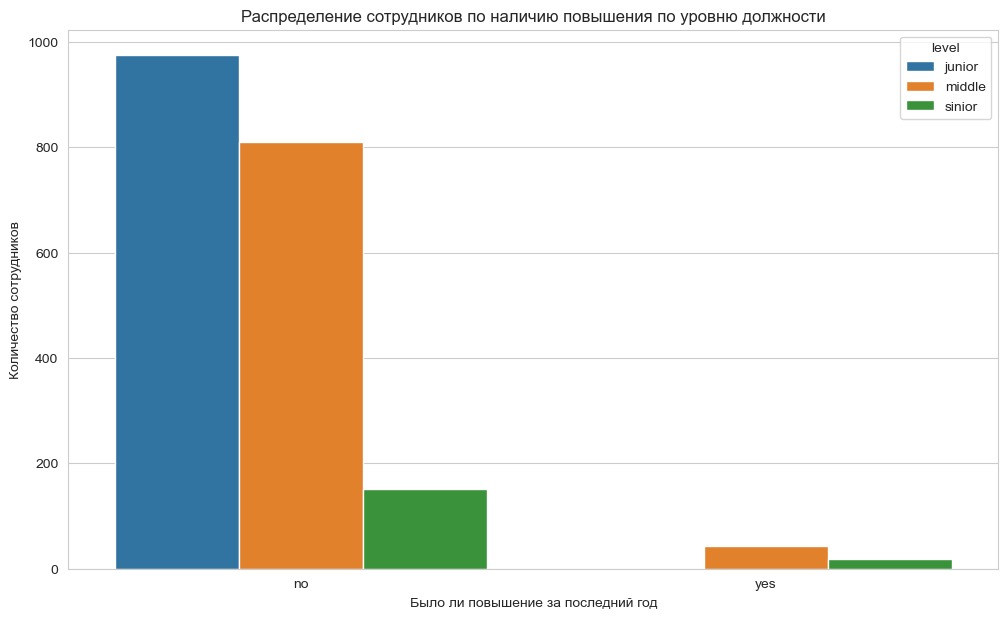

In [47]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'last_year_promo', hue='level')
plt.title('Распределение сотрудников по наличию повышения по уровню должности')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

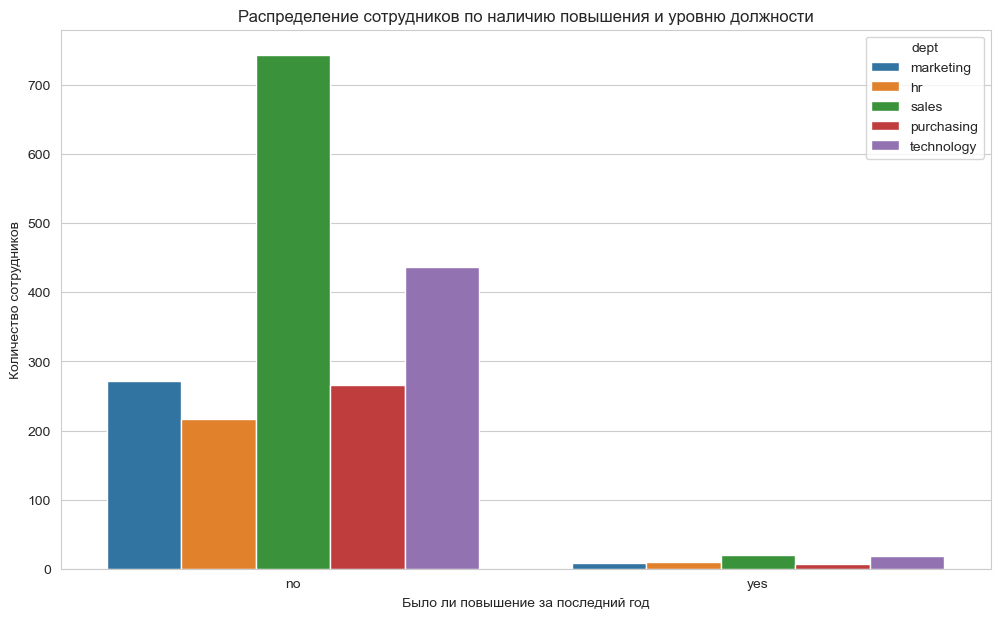

In [48]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'last_year_promo', hue='dept')
plt.title('Распределение сотрудников по наличию повышения и уровню должности')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

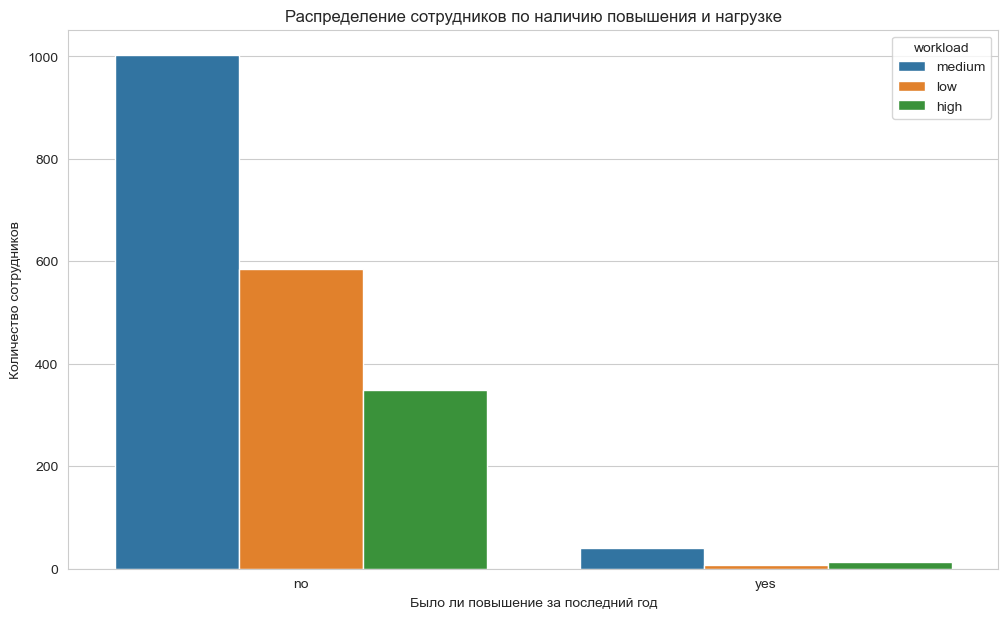

In [49]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'last_year_promo', hue='workload')
plt.title('Распределение сотрудников по наличию повышения и нагрузке')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

Распределение в тренировочной и тестовой выборке совпадает, за последний год было только 3%, среди джунов повышений не было. 

In [50]:
train_sat.last_year_violations.value_counts(1).round(2)

last_year_violations
no     0.86
yes    0.14
Name: proportion, dtype: float64

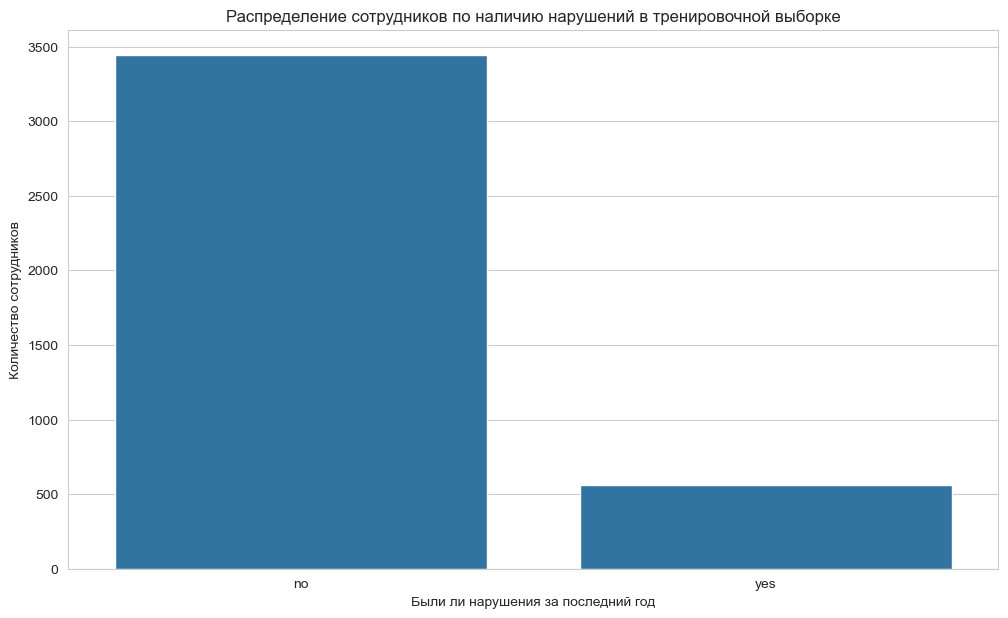

In [51]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'last_year_violations')
plt.title('Распределение сотрудников по наличию нарушений в тренировочной выборке')
a.set_xlabel('Были ли нарушения за последний год')
a.set_ylabel('Количество сотрудников');

In [52]:
test_feat.last_year_violations.value_counts(1).round(2)

last_year_violations
no     0.87
yes    0.13
Name: proportion, dtype: float64

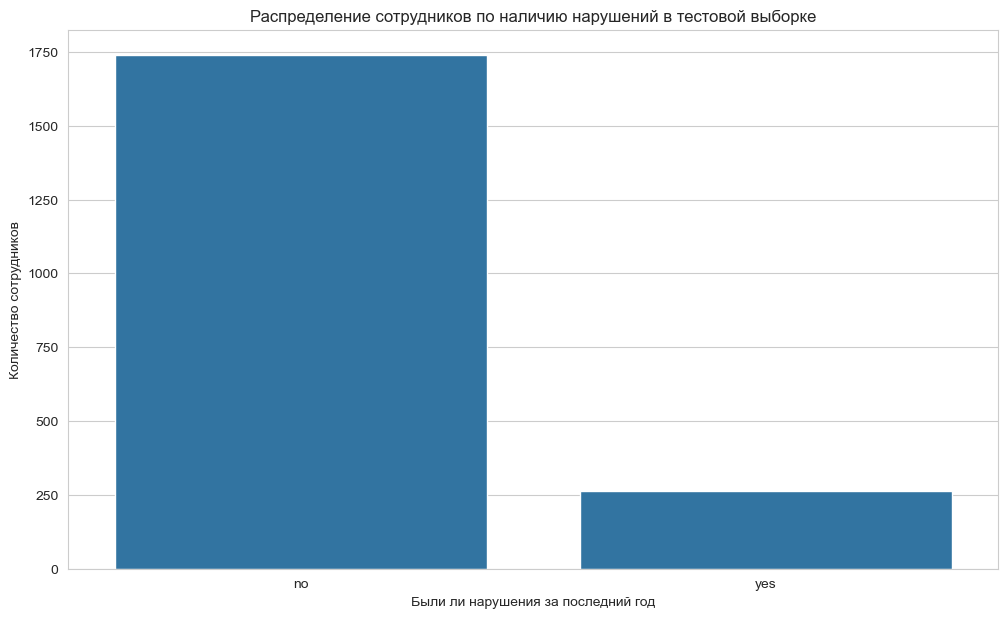

In [53]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'last_year_violations')
plt.title('Распределение сотрудников по наличию нарушений в тестовой выборке')
a.set_xlabel('Были ли нарушения за последний год')
a.set_ylabel('Количество сотрудников');

Распределение в тренировочной и тестовой выборке примерно одинаковое, нарушений трудового договора за последний год совершили 13-14% сотдрудников. 

In [54]:
train_sat.supervisor_evaluation.value_counts(1).round(2)

supervisor_evaluation
4    0.40
3    0.32
5    0.14
2    0.10
1    0.05
Name: proportion, dtype: float64

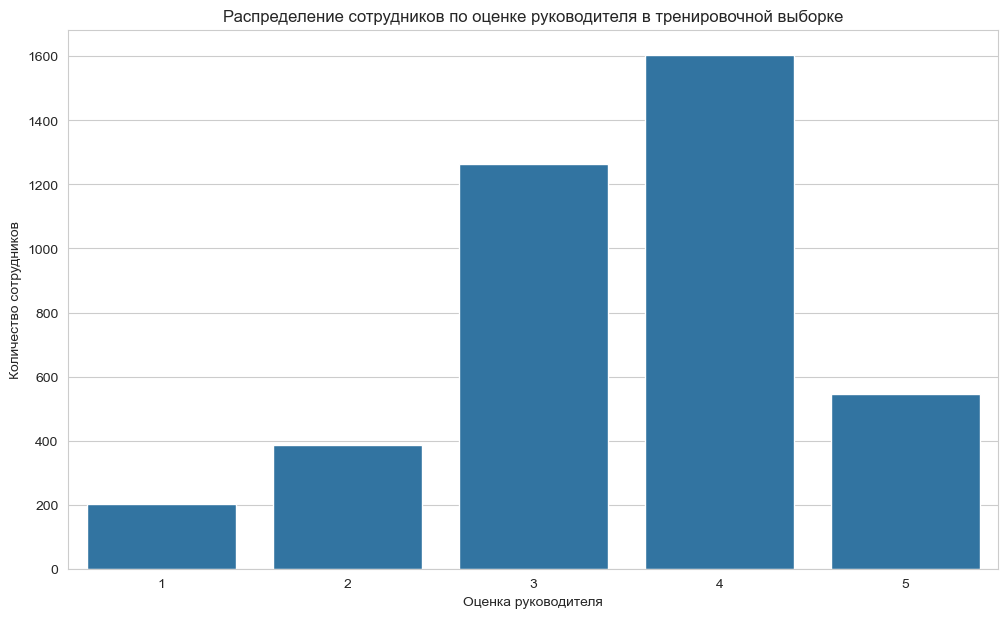

In [55]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_sat, x = 'supervisor_evaluation')
plt.title('Распределение сотрудников по оценке руководителя в тренировочной выборке')
a.set_xlabel('Оценка руководителя')
a.set_ylabel('Количество сотрудников');

In [56]:
test_feat.supervisor_evaluation.value_counts(1).round(2)

supervisor_evaluation
4    0.43
3    0.29
5    0.14
2    0.10
1    0.04
Name: proportion, dtype: float64

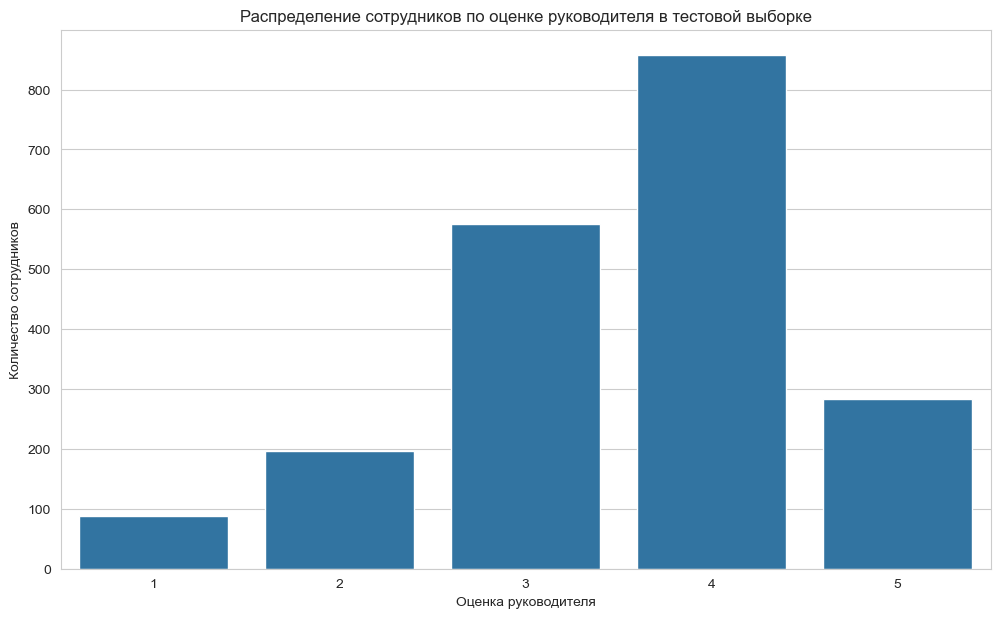

In [57]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_feat, x = 'supervisor_evaluation')
plt.title('Распределение сотрудников по оценке руководителя в тестовой выборке')
a.set_xlabel('Оценка руководителя')
a.set_ylabel('Количество сотрудников');

Распределение в выборках практически одинаковое. В основном все сотрудники хорошисты - хорошо выполняют свою работу, но есть куда стремиться, чтобы стать лучше, многие демонстрируют работу на 3, то есть качество их работы стоило бы улучшить. Совсем низких оценок (1-2) около 15%, примерно столько же сотрудников с отличной оценкой.

**Выводы:**
Среди анализируемых признаков две непрерывные величины - оценка удовлетворенности сотрудника, то есть целевой признак, а также заработная плата. В основном входящие признаки или категориальные, или дискретные величины, поэтому для анализа корреляции используем коэффициент Спирмена(в связи с наличием выбросов в зп) и `phik` для анализа и нелинейных зависимостей.

- Удовлетворение наибольшего числа сотрудников находится в диапазрен 0.6-0.8, хоть есть небольшой пик около значения 0.4. То есть сотрудники в основном удовлетворены работой, хотя улучшение для многих возможно.
- В распределении размера заработной платы есть длинный хвост справа, который указывает на наличие выбросов, то есть у большинства сотрудников зарпата до 50 тысяч, и только ограниченное число сотрудников получает более повышенную. Наиболее высокие зп в среднем у техотдела
- Около 60% сотрудников из отдела продаж или техотдела.
- Меньше всего в компании синьоров (10%), примерно равное процентное соотношение между мидлами и джунами с перевесом в сторону последних. Наиболее загруженные среди сотрудников - миддлы, среди наименее загруженных преобладают джуны. Примерно у половины сотрудников средняя загруженность.
- Распределение по уровню должности и по отделам совпадает с общим распределением по отделам.
- Большинство сотрудников работает в компании до 4 лет, совсем небольшое число сотрудников больше 7 лет. 
- За последний год было повышено только 3% сотрудников, среди джунов не было повышений
- Примерно у 15% сотрудников были нарушения трудового договора.
- Руководители в основном оценивают работу сотрудников на 4 или 3.

Посмотрим на самые высокие и низкие показатели удовлетворенности:

In [58]:
train_sat.loc[train_sat['job_satisfaction_rate'] <0.06]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
242,960700,sales,middle,medium,4,no,yes,2,37200,0.04
334,904973,technology,junior,medium,1,no,yes,2,25200,0.04
923,152252,sales,sinior,medium,5,no,yes,2,50400,0.04
1551,901101,sales,middle,high,3,no,yes,3,46800,0.05
1681,454738,sales,junior,medium,1,no,yes,3,20400,0.05
2077,524656,technology,middle,high,1,no,yes,2,56400,0.04
2717,681745,technology,sinior,high,5,no,yes,3,76800,0.03
2788,653687,sales,middle,medium,4,no,yes,3,31200,0.03
3141,898488,sales,middle,high,4,no,yes,2,45600,0.05
3265,582790,hr,junior,medium,1,no,yes,2,22800,0.05


In [59]:
train_sat.loc[train_sat['job_satisfaction_rate'] ==1 ]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1706,858008,sales,middle,low,6,yes,no,4,24000,1.0
3955,901323,technology,sinior,medium,8,yes,no,4,63600,1.0


In [60]:
test_sat.loc[test_sat['job_satisfaction_rate'] ==1 ]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,id
55,sales,sinior,medium,9,yes,no,4,58800,1.0,165557
181,sales,middle,high,5,yes,no,4,57600,1.0,722804
380,technology,middle,high,6,yes,no,4,69600,1.0,595409
630,marketing,sinior,medium,9,yes,no,4,61200,1.0,494074
1483,sales,sinior,high,10,yes,no,5,81600,1.0,757913


Среди выделившихся недовольных сотрудников есть работники разных отделов и уровней должности,  при этом у всех сотрудников есть нарушения за последний год,у них не было повышений, а оценка качества работы от руководителя равна 2 или 3. Возможно, их также могла не устраивать не соответсвующая нагрузке или уровню должности зарплата.

Среди 100% довольных сотрудники без нарушений трудового договора, с недавним повышением и отностельно высокой зарплатой или малой нагрузкой - это сотрудники уже долго проработавшие в компании, их уровень должности выше джуна.

Далее посмотрим на корреляцию между признаками.

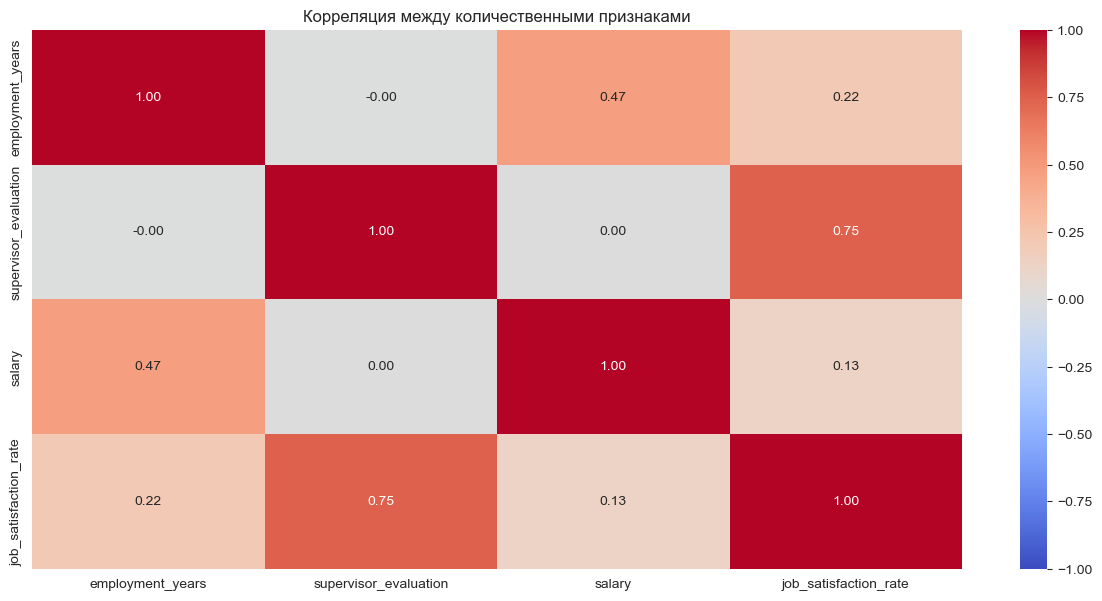

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(train_sat[['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']].corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1,  fmt='.2f')
plt.title('Корреляция между количественными признаками')
plt.show()

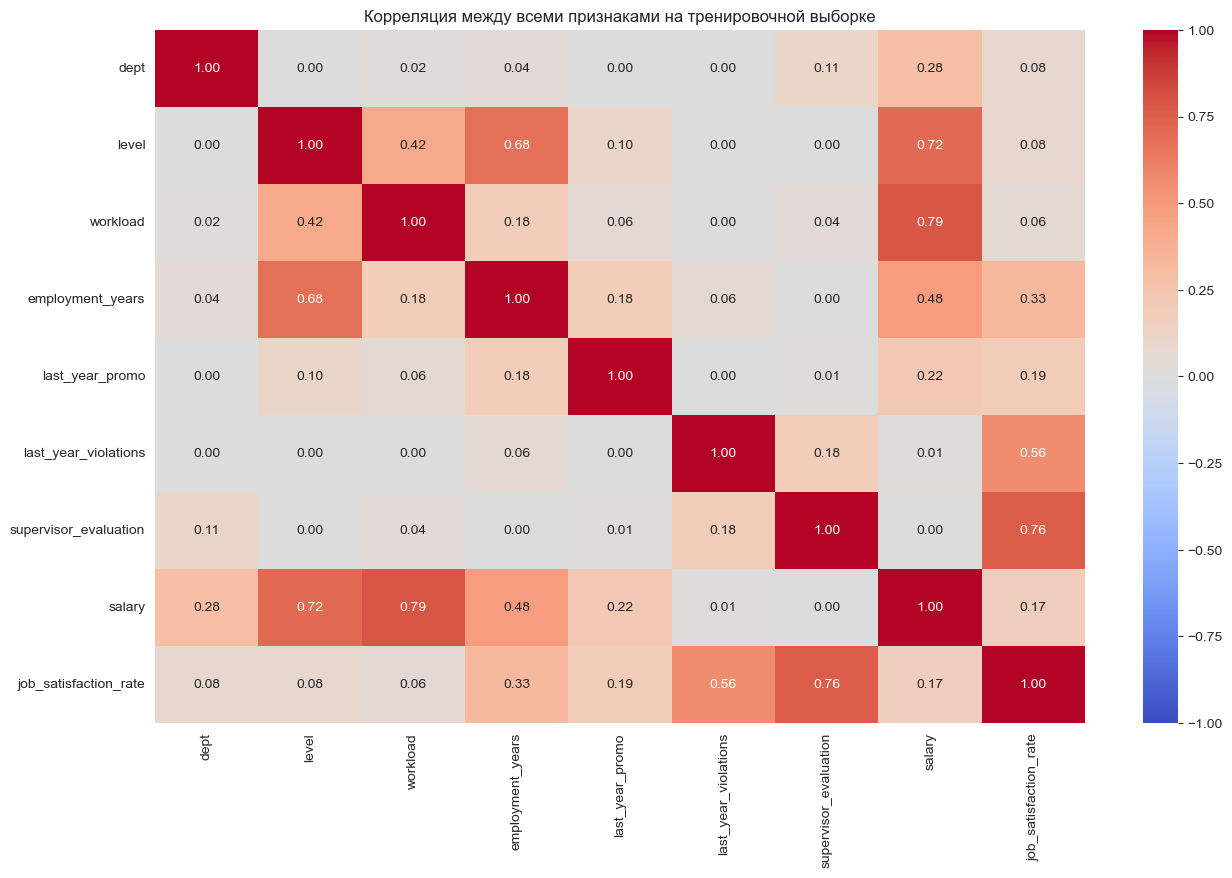

In [62]:
corr_phik = train_sat.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(15, 9))
sns.heatmap(corr_phik, annot=True, cmap='coolwarm', vmin=-1, fmt='.2f')
plt.title('Корреляция между всеми признаками на тренировочной выборке')
plt.show()

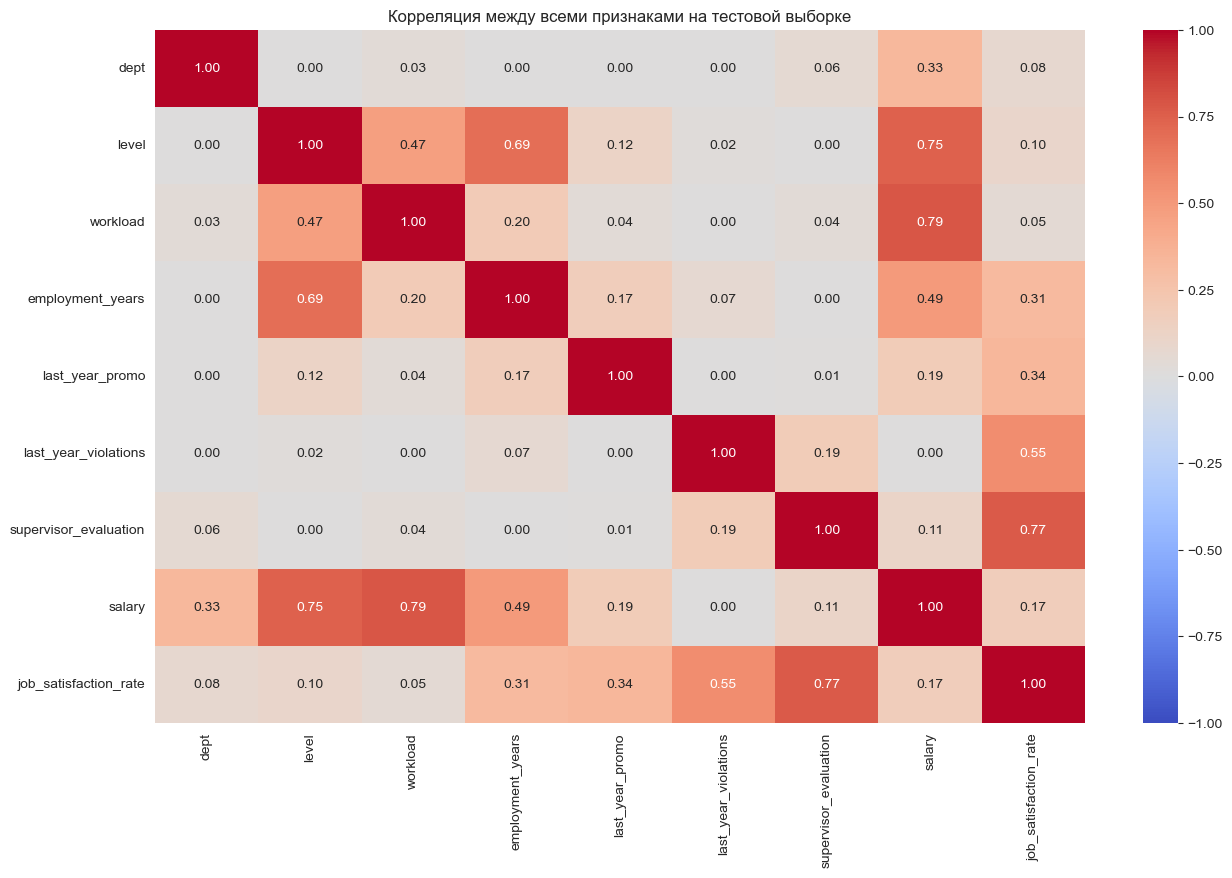

In [63]:
corr_phik = test_sat.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(15, 9))
sns.heatmap(corr_phik, annot=True, cmap='coolwarm', vmin=-1, fmt='.2f')
plt.title('Корреляция между всеми признаками на тестовой выборке')
plt.show()

**Выводы:**

Целевой признак коррелирует более всего с признаком оценки руководителя, то есть согласно данным, на удовлетворенность больше всего влияет довольство руководство своим сотрудником или справедливое оценивание его работы. Также существует средняя корреляция с признаком наличие нарушений трудового договора и меньшая корреляция с признаками повышения за последний год и количеством проработанных лет. На удивление совсем маленькая корреляция с зарплатой. Зарплата зависит от нагрузки, уровня должности и в какой-то степени от количества проработанных лет в компании. 

### Подготовка данных и выбор лучшей модели

- Вспомним, что в датафреймах были пропуски, которые мы будем обрабатывать в пайплайне. 
- Признаки мы будем изменять следующим образом: числовые будем масштабировать, уровень должности и нагрузку будем кодировать при помощь OrdinalEncoder, оставшиеся при помощи OneHotEncoder. 
- Будут выбраны два типа модели - линейная SVC и дерево решений DecisionTreeRegressor с различными гиперпараметрами для поиска наиболее точно решающей задачу модели. 
- В набор данных не будем включать 

In [64]:
RANDOM_STATE = 44
X_train = train_sat.drop(['id', 'job_satisfaction_rate'], axis=1)
y_train = train_sat['job_satisfaction_rate']
X_test = test_feat.drop('id', axis=1)
y_test = y_test_sat['job_satisfaction_rate']


ohe_col = ['dept', 'last_year_promo', 'last_year_violations']
ord_col = ['level', 'workload']
num_col = ['employment_years', 'supervisor_evaluation', 'salary']

In [65]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop="first", handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [66]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_bef',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder( 
                categories=
                           [
                               ['junior	', 'middle', 'sinior'],
                               ['low', 'medium', 'high']
                           ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )), 
        (
            'simpleImputer_aft',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [67]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', MinMaxScaler(), num_col)
    ],
    remainder='passthrough'
)

In [68]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('feature_selection', SelectKBest(score_func=f_regression)),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [69]:
param_grid = [
    {
        'feature_selection__k': [8, 'all'],
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(8, 20),
        'models__max_features': range(8, 16),
        'models__min_samples_leaf': range(5, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'feature_selection__k': [5, 8, 'all'],
        'models':[LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [70]:
def smape(y_true, y_pred):
    num = abs(y_pred - y_true)
    denom = (abs(y_pred) + abs(y_true)) / 2
    total = (num / denom).sum()
    return (total * 100 / y_true.shape[0])

In [71]:
smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

In [72]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring=smape_scorer
)

In [73]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                          'models__min_samples_leaf': range(5, 15),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'feature_selection__k': [5, 8, 'all'],
                          'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False, response_method='predict'))

In [74]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', grid_search.best_score_ *(-1))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [75]:
y_pred = grid_search.predict(X_test)

In [76]:
print(f'Метрика SMAPE лучшей модели на тестовой выборке: {round(smape(y_test, y_pred), 2)}')

Метрика SMAPE лучшей модели на тестовой выборке: 14.6


### Промежуточный вывод

После исследования цлевого и входных признаков, был создан пайплайн, который выбрал лучшую модель для решения поставленной задачи на основе метрики SMAPE, параметры модели следующие:

- модель DecisionTreeRegressor
- max_depth=16,
- max_features=10,
- min_samples_leaf=5,
- random_state=44
- SelectKBest, k='all'
- при масштабировании используем RobustScaler()

Получившаяся метрика SMAPE на тестовых данных: 14.6 

Данная модель ищет более сложные зависимости, чем линейная модель, поэтому ее результат соответствует поставленной задаче и был выбран в процессе обработки в пайплайне в качестве лучшей. Между входными данными взаимосвязь более сложно устроенная, чем линейная. 

## Задача 2: предсказание увольнения сотрудников

### Обзор данных

In [77]:
general_info(train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

id                       4000
dept                        5
level                       3
workload                    3
employment_years           10
last_year_promo             2
last_year_violations        2
supervisor_evaluation       5
salary                     69
quit                        2
dtype: int64

In [78]:
general_info(y_test_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

id      2000
quit       2
dtype: int64

**Выводы:** 
- Пропусков в новых данных нет
- Необходимо проверить наличие явных дубликатов
- Названия колонок и типы данных в норме
- Неявных дубликатов из-за опечаток в тренировочных данных нет
- Существует то же несоответствие id и индекса, что и в прошлой задаче, которое необходимо учитывать в дальнейшей работе

### Предобработка данных

In [79]:
print(train_quit.duplicated().sum())
y_test_quit.duplicated().sum()

0


0

In [80]:
print(train_quit.dept.unique())
print(train_quit.workload.unique())
train_quit.level.unique()

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['high' 'medium' 'low']


array(['middle', 'junior', 'sinior'], dtype=object)

In [81]:
test_quit = test_feat.set_index('id').join(y_test_quit.set_index('id'), on='id')
test_quit['id'] = test_quit.index
test_quit.index = range(0, 2000)
test_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,id
0,marketing,junior,medium,2,no,no,5,28800,no,485046
1,hr,junior,medium,1,no,no,4,30000,no,686555
2,sales,middle,low,5,no,no,4,19200,no,467458
3,sales,middle,low,6,no,no,4,19200,no,418655
4,hr,middle,medium,5,no,no,5,40800,no,789145
...,...,...,...,...,...,...,...,...,...,...
1995,marketing,junior,low,3,no,no,3,20400,yes,393147
1996,technology,middle,low,3,no,no,2,21600,yes,109582
1997,technology,junior,low,1,no,no,3,14400,yes,305653
1998,technology,middle,low,8,no,no,1,32400,no,160233


In [82]:
y_test_quit = test_quit[['id', 'quit']]
y_test_quit

,id,quit
0,485046,no
1,686555,no
2,467458,no
3,418655,no
4,789145,no
...,...,...
1995,393147,yes
1996,109582,yes
1997,305653,yes
1998,160233,no


**Вывод:**
- Явных дубликатов нет
- Сохраняются пропуски в датасете с тестовыми входными признаками, их мы обработаем в пайплайне
- Мы удостоверились в верности написания категориальных значений во входных признаках
- Были объединены тестовые данные по id c целевым признаком для верности функционирования и проверки модели в дальнейшем.

### Исследовательский анализ

In [83]:
train_quit.quit.value_counts(1).round(2)

quit
no     0.72
yes    0.28
Name: proportion, dtype: float64

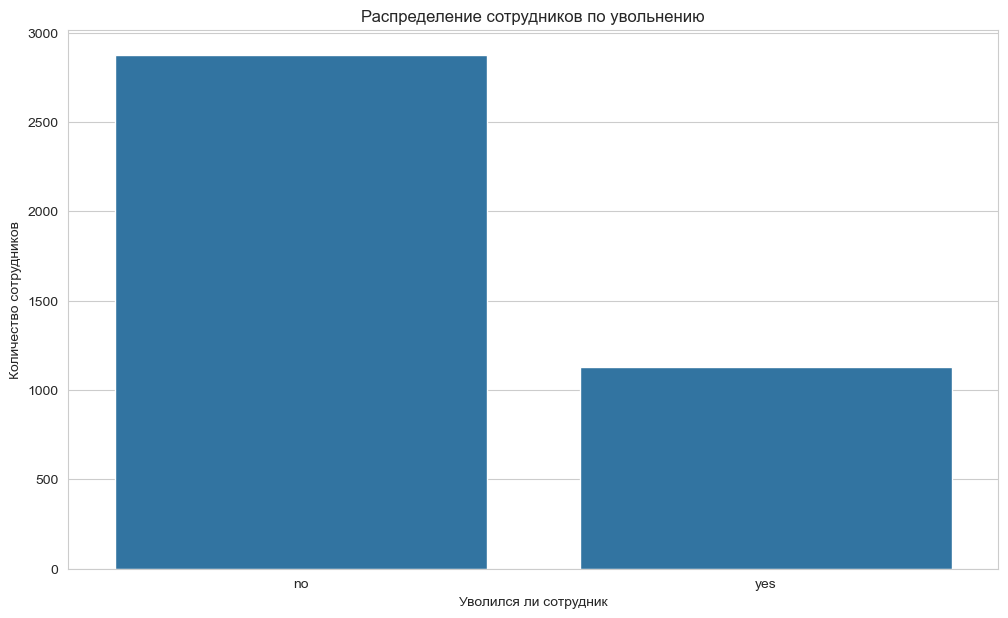

In [84]:
plt.figure(figsize=(12,7))
a = sns.countplot(data =train_quit, x = 'quit')
plt.title('Распределение сотрудников по увольнению')
a.set_xlabel('Уволился ли сотрудник')
a.set_ylabel('Количество сотрудников');

In [85]:
y_test_quit.quit.value_counts(1).round(2)

quit
no     0.72
yes    0.28
Name: proportion, dtype: float64

В целевом признаке есть дисбаланс примерно 70/30. Соотношение тестовой и тренировочной выборок совпадают.

Рассмотрим входные признаки и их соотношение. 

In [86]:
train_quit['salary'].describe()

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

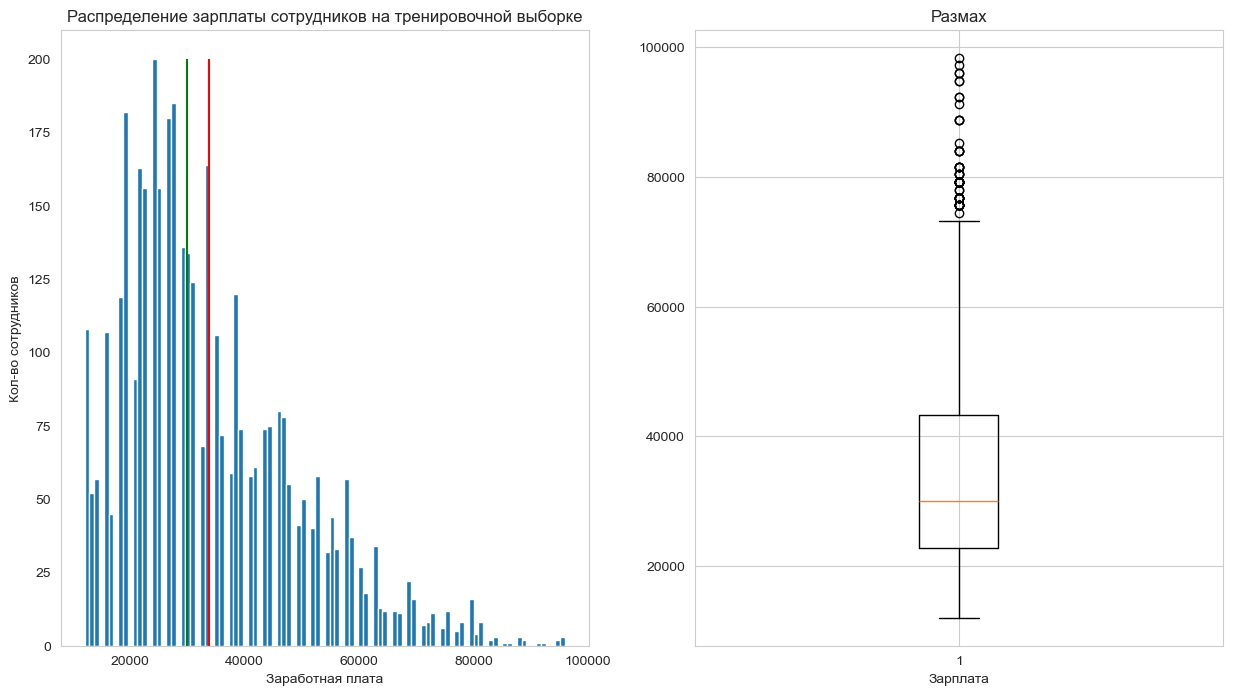

In [87]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(train_quit['salary'], bins=100)
ax[0].vlines(train_quit['salary'].mean(), ymin=0, ymax=200, color='red', label='среднее')
ax[0].vlines(train_quit['salary'].median(), ymin=0, ymax=200, color='green', label='медиана')
ax[0].set_xlabel('Заработная плата')
ax[0].set_ylabel('Кол-во сотрудников')
ax[0].set_title('Распределение зарплаты сотрудников на тренировочной выборке')
ax[0].grid()

ax[1].boxplot(train_sat['salary'])
ax[1].set_xlabel('Зарплата')
ax[1].set_title('Размах')
plt.show()

In [88]:
train_quit.dept.value_counts(1).round(2)

dept
sales         0.36
technology    0.23
purchasing    0.15
marketing     0.15
hr            0.12
Name: proportion, dtype: float64

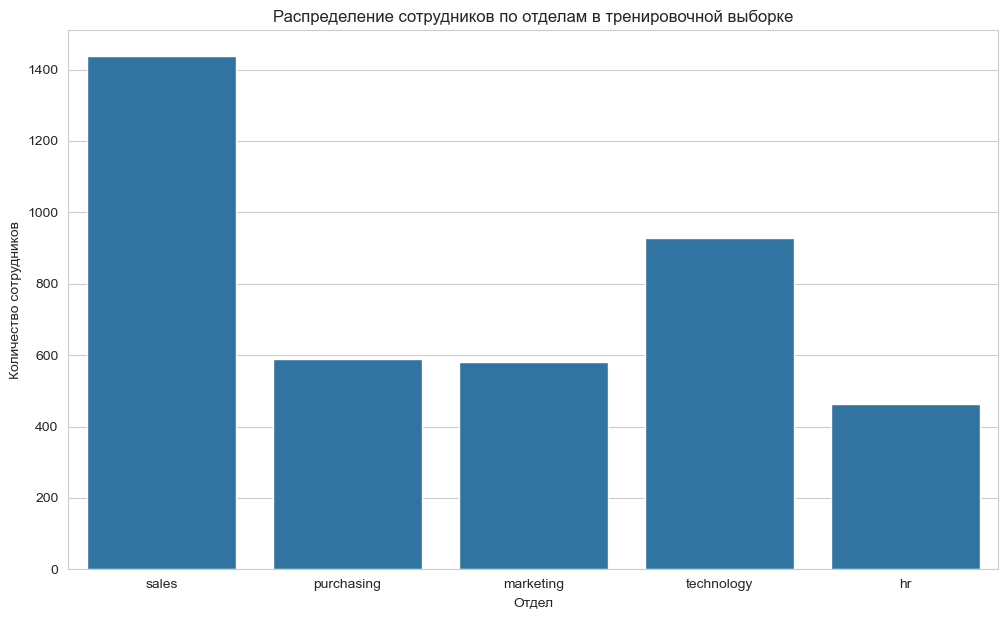

In [89]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'dept')
plt.title('Распределение сотрудников по отделам в тренировочной выборке')
a.set_xlabel('Отдел')
a.set_ylabel('Количество сотрудников');

In [90]:
train_quit.workload.value_counts(1).round(2)

workload
medium    0.53
low       0.30
high      0.17
Name: proportion, dtype: float64

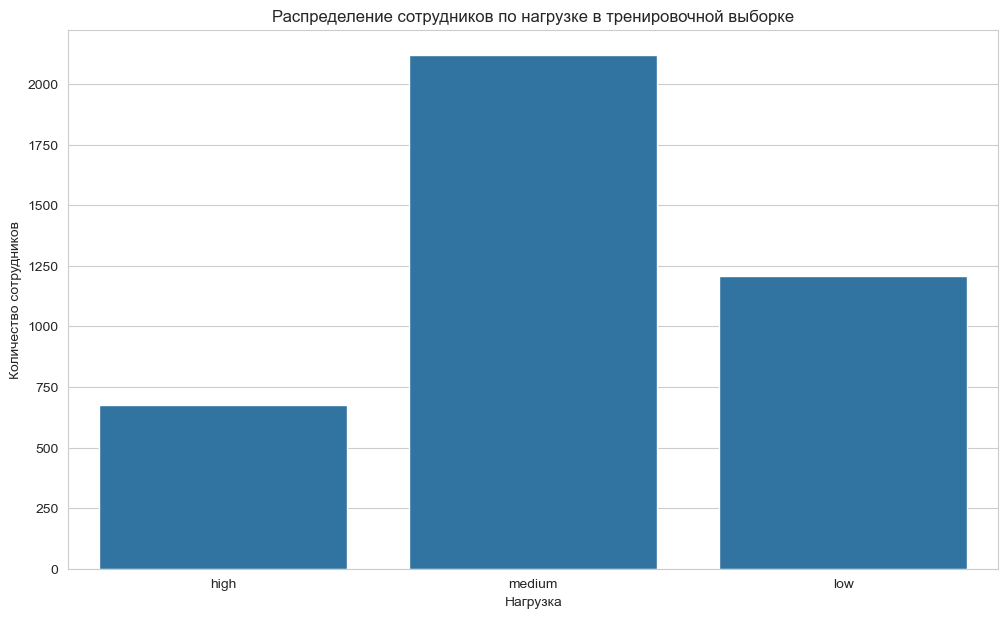

In [91]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'workload')
plt.title('Распределение сотрудников по нагрузке в тренировочной выборке')
a.set_xlabel('Нагрузка')
a.set_ylabel('Количество сотрудников');

In [92]:
train_quit.level.value_counts(1).round(2)

level
junior    0.49
middle    0.42
sinior    0.09
Name: proportion, dtype: float64

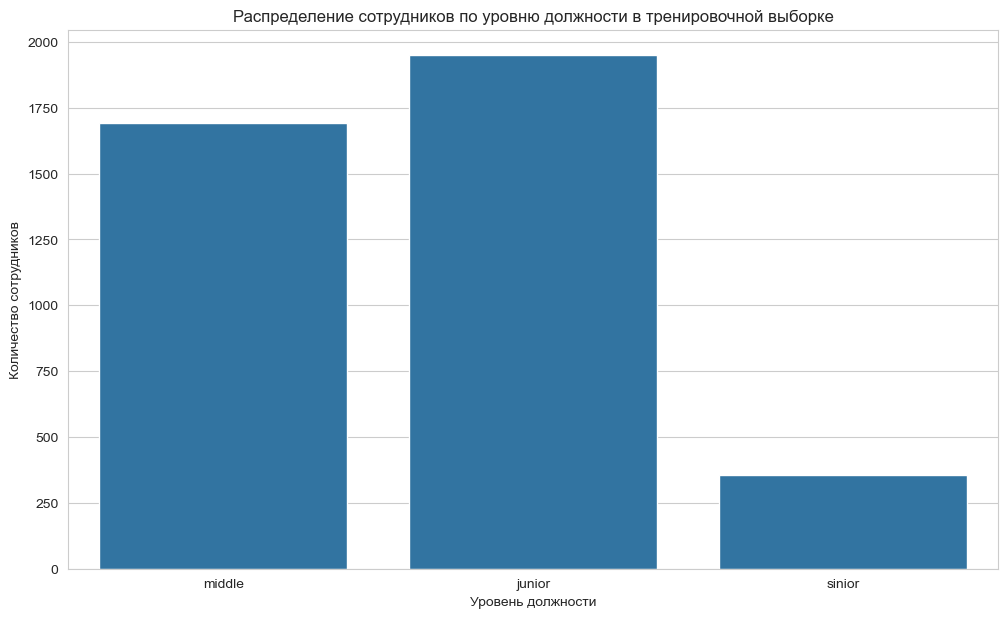

In [93]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'level')
plt.title('Распределение сотрудников по уровню должности в тренировочной выборке')
a.set_xlabel('Уровень должности')
a.set_ylabel('Количество сотрудников');

In [94]:
train_quit.employment_years.value_counts(1).round(2)

employment_years
1     0.25
2     0.19
3     0.12
4     0.10
5     0.09
7     0.08
6     0.07
8     0.04
9     0.03
10    0.02
Name: proportion, dtype: float64

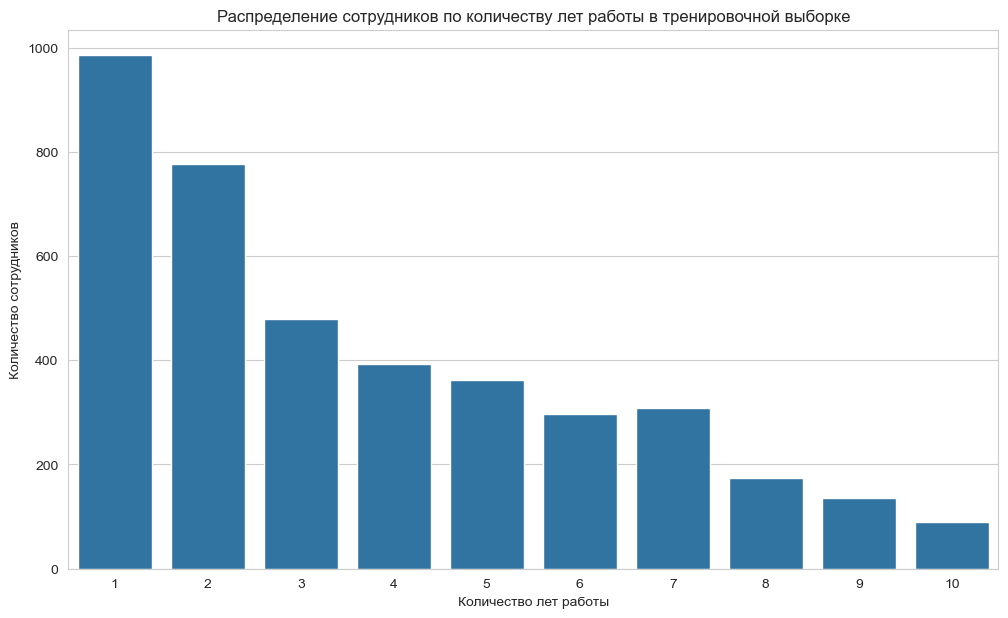

In [95]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'employment_years')
plt.title('Распределение сотрудников по количеству лет работы в тренировочной выборке')
a.set_xlabel('Количество лет работы')
a.set_ylabel('Количество сотрудников');

In [96]:
train_quit.last_year_promo.value_counts(1).round(2)

last_year_promo
no     0.97
yes    0.03
Name: proportion, dtype: float64

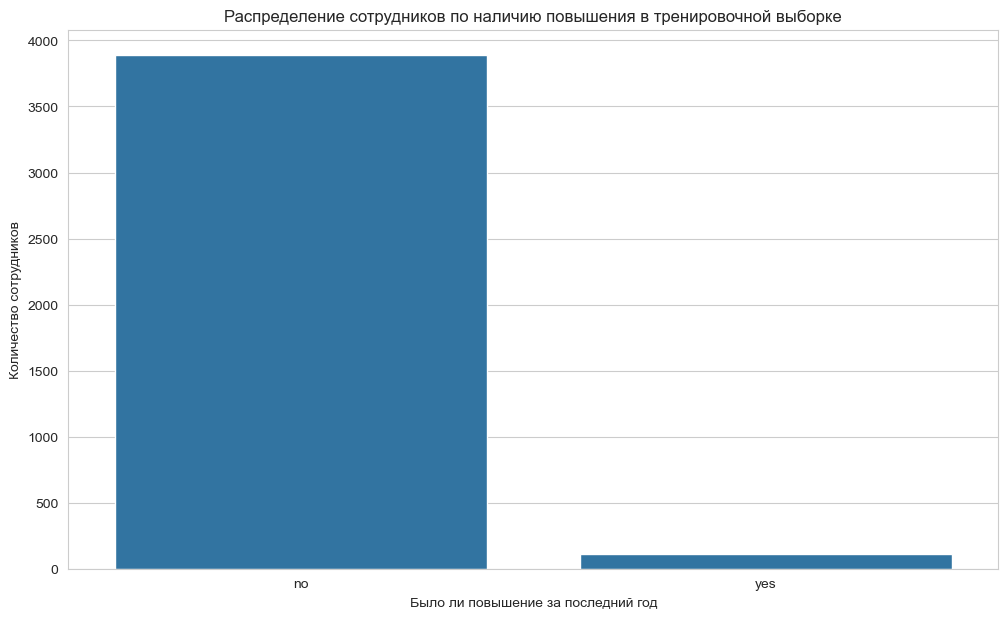

In [97]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'last_year_promo')
plt.title('Распределение сотрудников по наличию повышения в тренировочной выборке')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

In [98]:
train_quit.last_year_violations.value_counts(1).round(2)

last_year_violations
no     0.86
yes    0.14
Name: proportion, dtype: float64

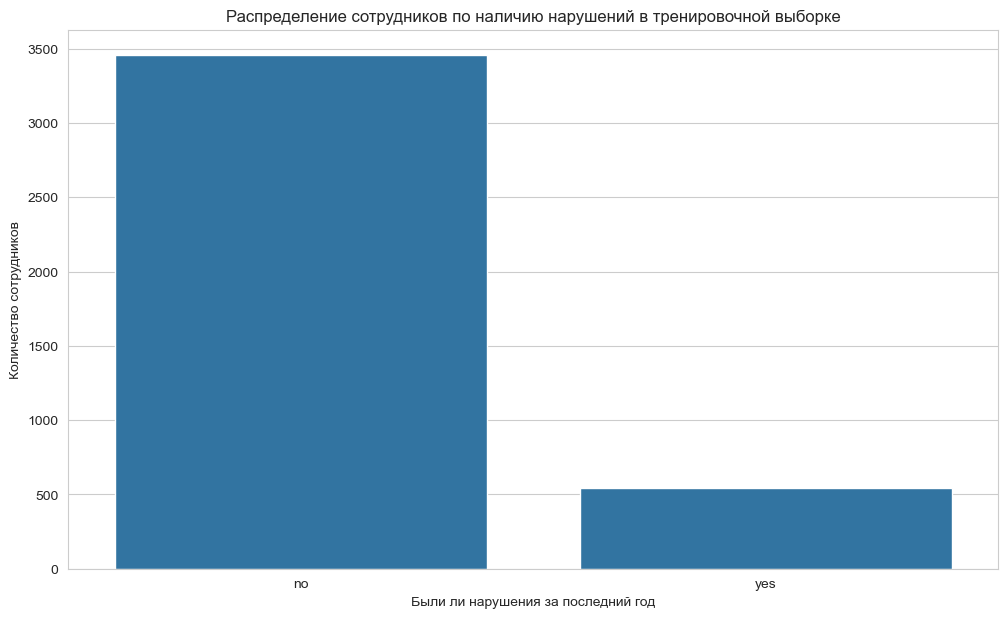

In [99]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'last_year_violations')
plt.title('Распределение сотрудников по наличию нарушений в тренировочной выборке')
a.set_xlabel('Были ли нарушения за последний год')
a.set_ylabel('Количество сотрудников');

In [100]:
train_quit.supervisor_evaluation.value_counts(1).round(2)

supervisor_evaluation
4    0.41
3    0.31
5    0.13
2    0.10
1    0.05
Name: proportion, dtype: float64

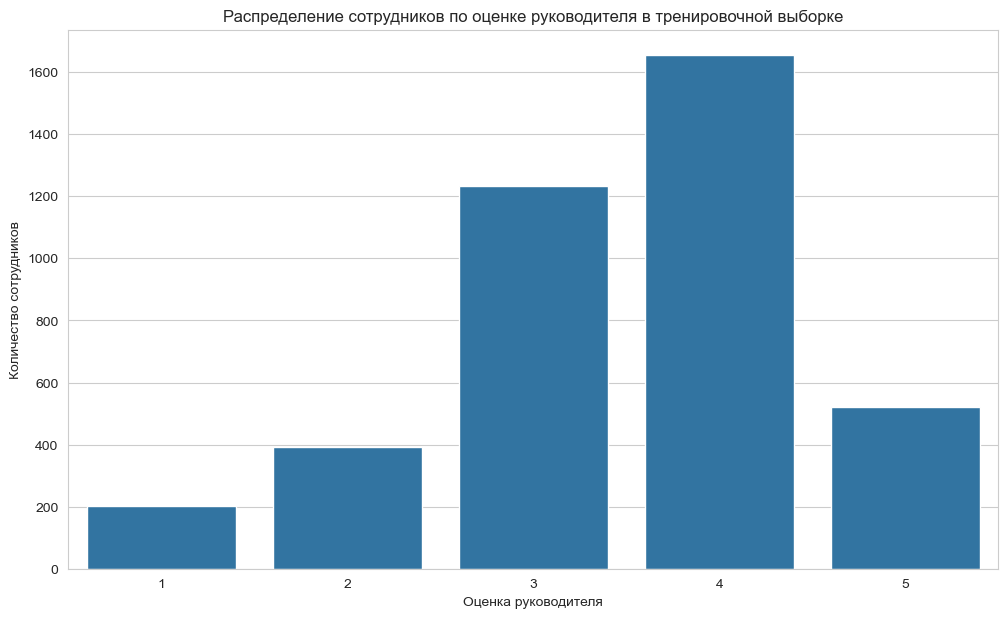

In [101]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'supervisor_evaluation')
plt.title('Распределение сотрудников по оценке руководителя в тренировочной выборке')
a.set_xlabel('Оценка руководителя')
a.set_ylabel('Количество сотрудников');

Распределение данных в тренировочной выборке такое же, как и в предыдущей тренировочной выборке, а также в тествой выборке. Рассмотрим входные признаки с учетом целевого. 

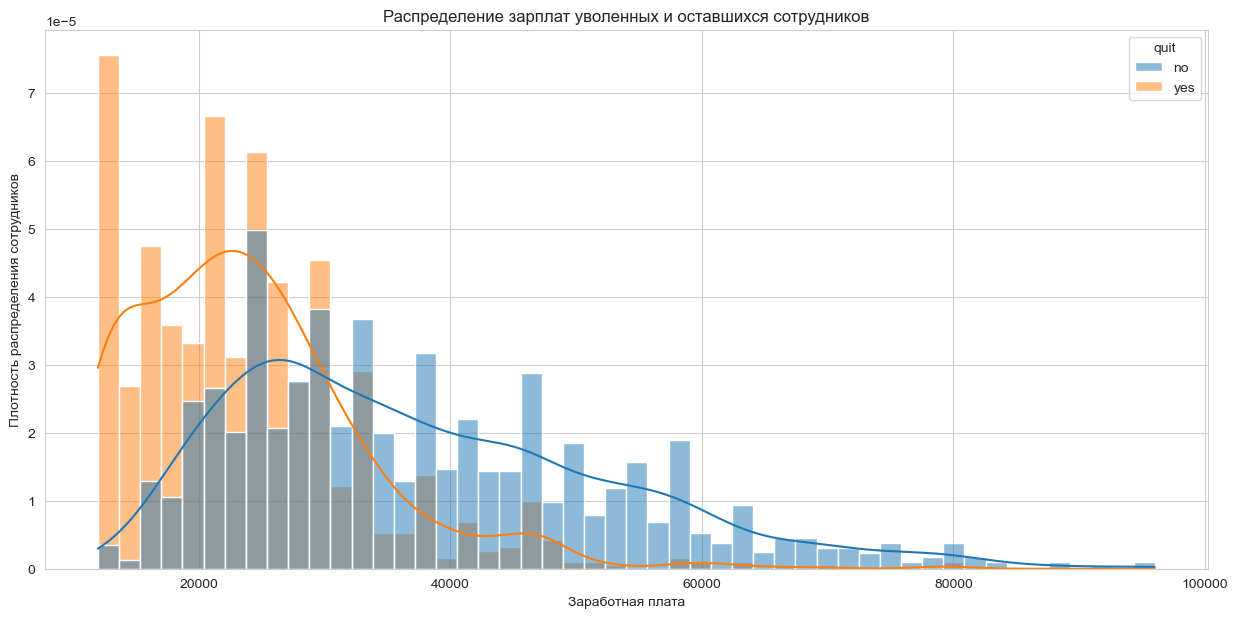

In [102]:
plt.figure(figsize=(15,7))
b = sns.histplot(data=train_quit, bins=50, kde=True, hue ='quit', x = 'salary', stat='density', common_norm=False);
plt.title('Распределение зарплат уволенных и оставшихся сотрудников')
b.set_xlabel('Заработная плата')
b.set_ylabel('Плотность распределения сотрудников');

In [103]:
train_quit.loc[train_quit['quit']== 'yes', 'salary'].describe()

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64

In [104]:
train_quit.loc[train_quit['quit']== 'no', 'salary'].describe()

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64

В среднем заработная плата уволившихся сотрудников меньше, чем у оставшихся, разница составляет примерно 13 тысяч. При этом хвост справа у оставшихся сотрудников длиннее, максимальное значение зп оставшегося сотрудника превышает зп уволившегося примерно на 16 тысяч рублей. 

In [105]:
train_quit.loc[train_quit['quit']== 'yes', 'dept'].value_counts(1).round(2)

dept
sales         0.36
technology    0.24
purchasing    0.15
marketing     0.14
hr            0.10
Name: proportion, dtype: float64

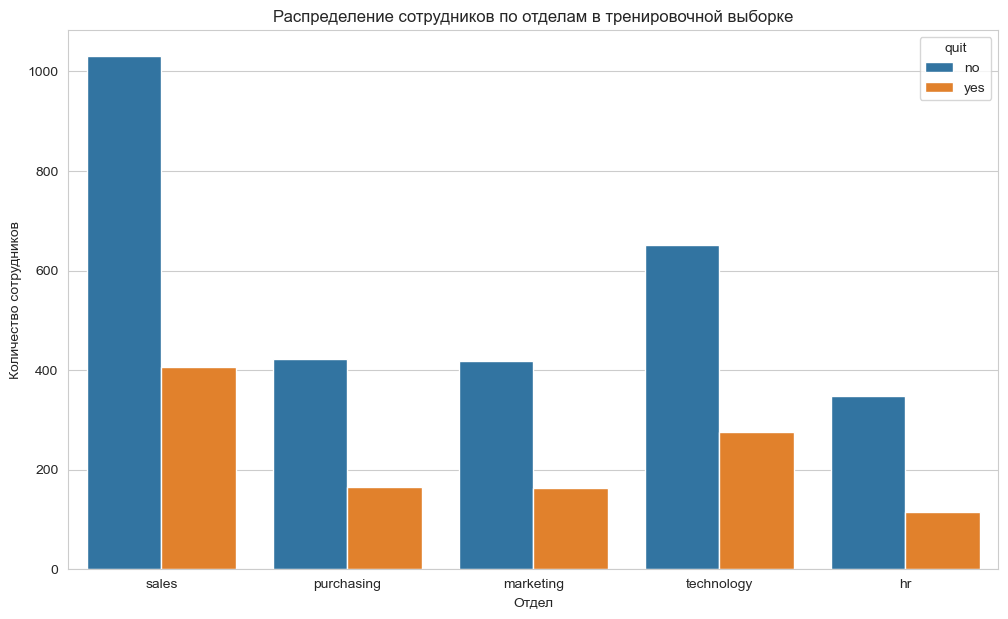

In [106]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'dept', hue='quit')
plt.title('Распределение сотрудников по отделам в тренировочной выборке')
a.set_xlabel('Отдел')
a.set_ylabel('Количество сотрудников');

In [107]:
depts = ['sales', 'purchasing', 'marketing', 'technology', 'hr']
for dept in depts:
    quit_count = train_quit.loc[(train_quit['dept']==dept) & (train_quit['quit']=='yes'), 'dept'].count()
    dept_count = train_quit.loc[train_quit['dept']==dept, 'dept'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся из отдела {dept} относительно общего числа сотрудников в отделе: {per_cent.round(2)}')

Процент уволившихся из отдела sales относительно общего числа сотрудников в отделе: 28.3
Процент уволившихся из отдела purchasing относительно общего числа сотрудников в отделе: 28.23
Процент уволившихся из отдела marketing относительно общего числа сотрудников в отделе: 28.01
Процент уволившихся из отдела technology относительно общего числа сотрудников в отделе: 29.74
Процент уволившихся из отдела hr относительно общего числа сотрудников в отделе: 25.0


За исключением пары отличий в 1% распределение уволившихся совпадает с общим распределением сотрудников по отделам - больше всего в отделе продаж и техотделе. В процентном соотношении относительно числа сотрудников в отделе больше всего увольнений в техотделе - около 30%, меньше всего увольняются из отдела кадров - четверть сотрудников, в остальных отделах процент увольнений около 28%.

In [108]:
train_quit.loc[train_quit['quit']== 'yes', 'workload'].value_counts(1).round(2)

workload
low       0.46
medium    0.43
high      0.11
Name: proportion, dtype: float64

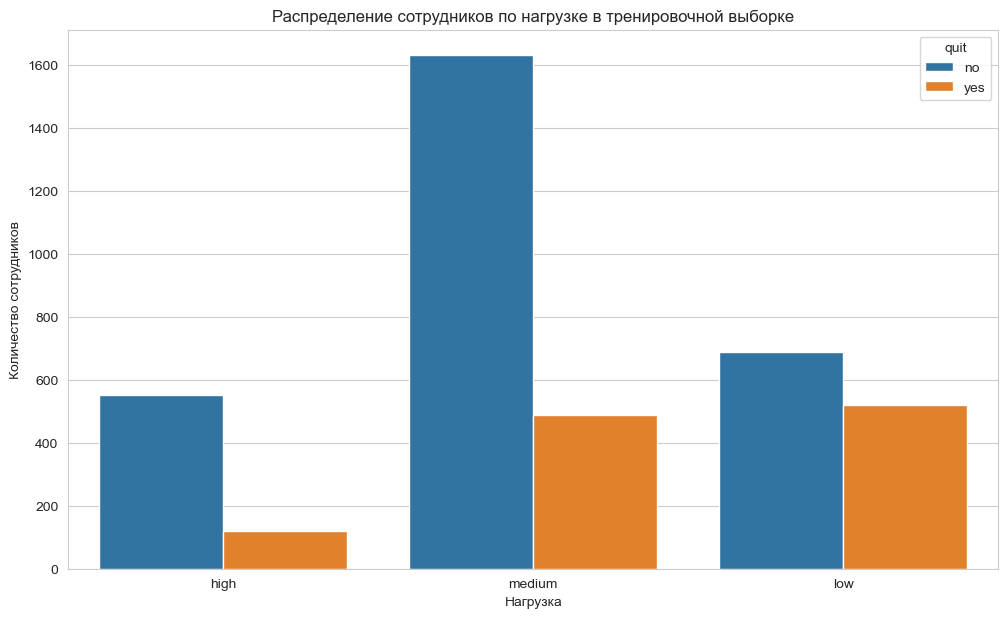

In [109]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'workload', hue='quit')
plt.title('Распределение сотрудников по нагрузке в тренировочной выборке')
a.set_xlabel('Нагрузка')
a.set_ylabel('Количество сотрудников');

In [110]:
workloads = ['low', 'medium', 'high']
for workload in workloads:
    quit_count = train_quit.loc[(train_quit['workload']==workload) & (train_quit['quit']=='yes'), 'workload'].count()
    dept_count = train_quit.loc[train_quit['workload']==workload, 'workload'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся с нагрузкой {workload} относительно общего числа сотрудников с такой нагрузкой: {per_cent.round(2)}')

Процент уволившихся с нагрузкой low относительно общего числа сотрудников с такой нагрузкой: 42.96
Процент уволившихся с нагрузкой medium относительно общего числа сотрудников с такой нагрузкой: 23.04
Процент уволившихся с нагрузкой high относительно общего числа сотрудников с такой нагрузкой: 17.95


Соотношение относительно общей тренировочной выборке изменилось. Напомним, что в общей выборке распределение от наименьшей к наибольшей нагрузке было следующим: 30 - 53 - 17. Среди уволившихся больше тех сотрудников, у которых была маленькая нагрузка. То есть возможно на увольнение влияет и недостаточная нагрузка, в связи с которой у сотрудника нет возможности развиваться или получать большую зарплату, и поэтому они решают сменить компанию. Относительно всех сотрудников с маленькой нагрузкой 43% из них увольняются, что является довольно большой долей, близкой к половине. 

In [111]:
train_quit.loc[train_quit['quit']== 'yes', 'level'].value_counts(1).round(2)

level
junior    0.89
middle    0.10
sinior    0.02
Name: proportion, dtype: float64

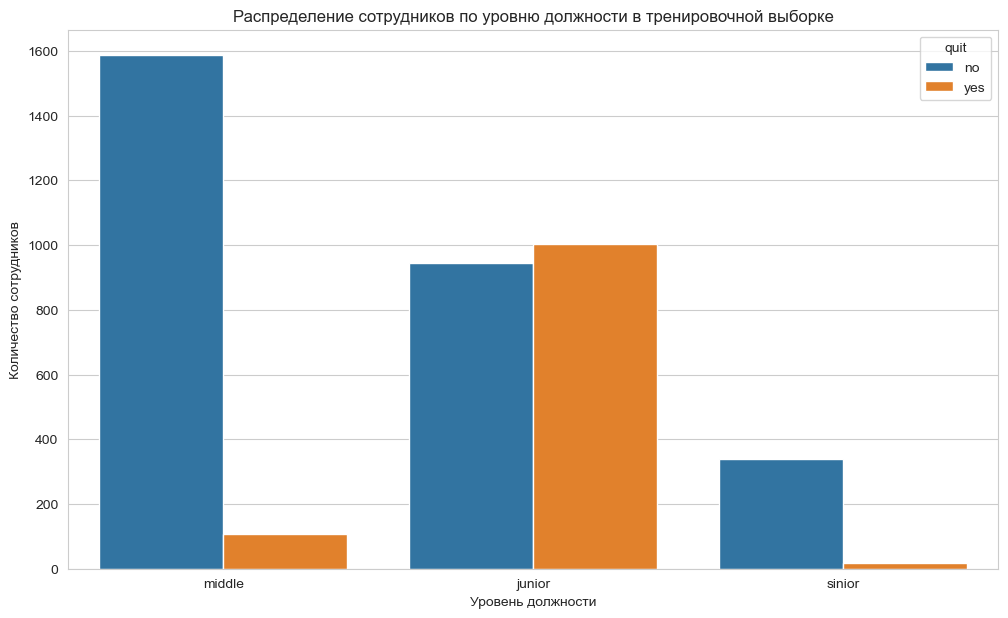

In [112]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'level', hue='quit')
plt.title('Распределение сотрудников по уровню должности в тренировочной выборке')
a.set_xlabel('Уровень должности')
a.set_ylabel('Количество сотрудников');

In [113]:
levels = ['junior', 'middle', 'sinior']
for level in levels:
    quit_count = train_quit.loc[(train_quit['level']==level) & (train_quit['quit']=='yes'), 'level'].count()
    dept_count = train_quit.loc[train_quit['level']==level, 'level'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся с уровнем должности {level} относительно общего числа сотрудников с таким же уровнем: {per_cent.round(2)}')

Процент уволившихся с уровнем должности junior относительно общего числа сотрудников с таким же уровнем: 51.46
Процент уволившихся с уровнем должности middle относительно общего числа сотрудников с таким же уровнем: 6.38
Процент уволившихся с уровнем должности sinior относительно общего числа сотрудников с таким же уровнем: 4.76


Как и в случае с нагрузкой соотношение относительно общей выборки значительно изменилось. В общей выборке от наименьшего уровня должности к наибольшуему распределение следующее: 49 - 42 - 9. То есть соотношение изменилось на 40%, среди уволившихся практически 90% сотрудников - джуны. Относительно всех джунов увольняется больше половины, тогда как среди сотрудников других уровней увольнения равны около 5%, что является значительной разницей. Вновь повторим гипотезу о возможном отсутствии роста или возможности быстрого роста для джунов, возможно, им не хватает наставнических указаний со стороны сотрудников других уровней в связи с их большей загруженностью. Возможно, джуны устраиваются на работу в компанию для прохождния стажировок и после них решают не оставаться в качестве сотрудников.

In [114]:
train_quit.loc[train_quit['quit']== 'yes', 'employment_years'].value_counts(1).round(2)

employment_years
1     0.53
2     0.26
3     0.14
4     0.02
5     0.02
6     0.01
7     0.01
10    0.00
8     0.00
9     0.00
Name: proportion, dtype: float64

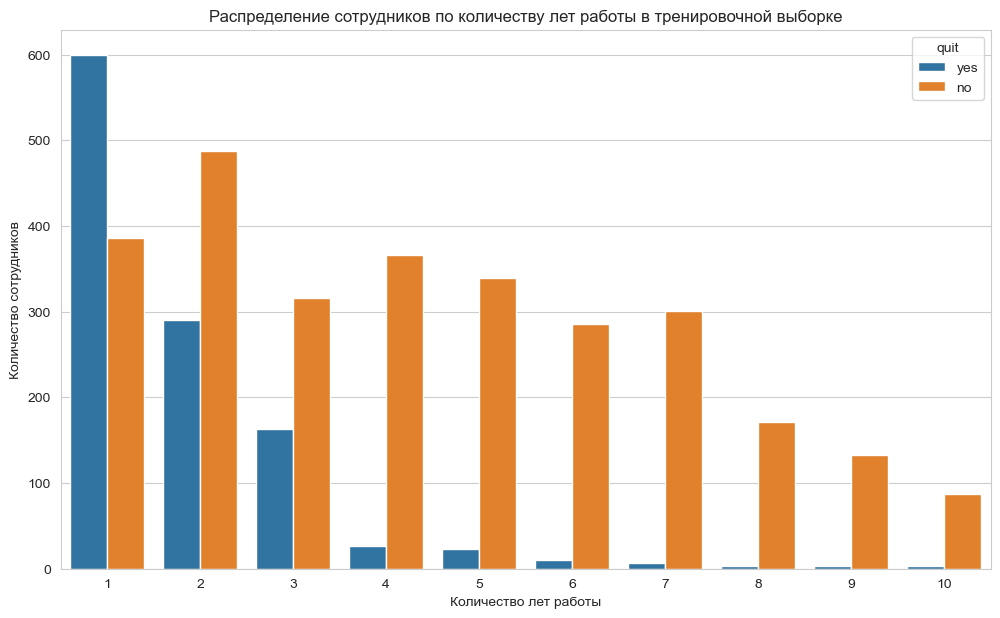

In [115]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'employment_years', hue='quit')
plt.title('Распределение сотрудников по количеству лет работы в тренировочной выборке')
a.set_xlabel('Количество лет работы')
a.set_ylabel('Количество сотрудников');

In [116]:
for employment_year in range(1, 11):
    quit_count = train_quit.loc[(train_quit['employment_years']==employment_year) & (train_quit['quit']=='yes'), 'employment_years'].count()
    dept_count = train_quit.loc[train_quit['employment_years']==employment_year, 'employment_years'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся, проработавших {employment_year} лет относительно общего числа сотрудников с таким же стажем: {per_cent.round(2)}')

Процент уволившихся, проработавших 1 лет относительно общего числа сотрудников с таким же стажем: 60.81
Процент уволившихся, проработавших 2 лет относительно общего числа сотрудников с таким же стажем: 37.32
Процент уволившихся, проработавших 3 лет относительно общего числа сотрудников с таким же стажем: 34.03
Процент уволившихся, проработавших 4 лет относительно общего числа сотрудников с таким же стажем: 6.87
Процент уволившихся, проработавших 5 лет относительно общего числа сотрудников с таким же стажем: 6.35
Процент уволившихся, проработавших 6 лет относительно общего числа сотрудников с таким же стажем: 3.38
Процент уволившихся, проработавших 7 лет относительно общего числа сотрудников с таким же стажем: 2.27
Процент уволившихся, проработавших 8 лет относительно общего числа сотрудников с таким же стажем: 1.72
Процент уволившихся, проработавших 9 лет относительно общего числа сотрудников с таким же стажем: 2.21
Процент уволившихся, проработавших 10 лет относительно общего числа со

Здесь также можно наблюдать изменившееся соотношени относительно общему распределению тренировочной выборки. Абсолютное большинство (96%) уволившихся проработало 1-3 года в компании. Среди сотрудников со стажем в год увольняются 61%, со стажем 2 и 3 года около 40% и 35%. Среди сотрудников с большим стажем процент увольнения меньше 7%. 

In [117]:
train_quit.loc[train_quit['quit']== 'yes', 'last_year_promo'].value_counts(1).round(2)

last_year_promo
no     1.0
yes    0.0
Name: proportion, dtype: float64

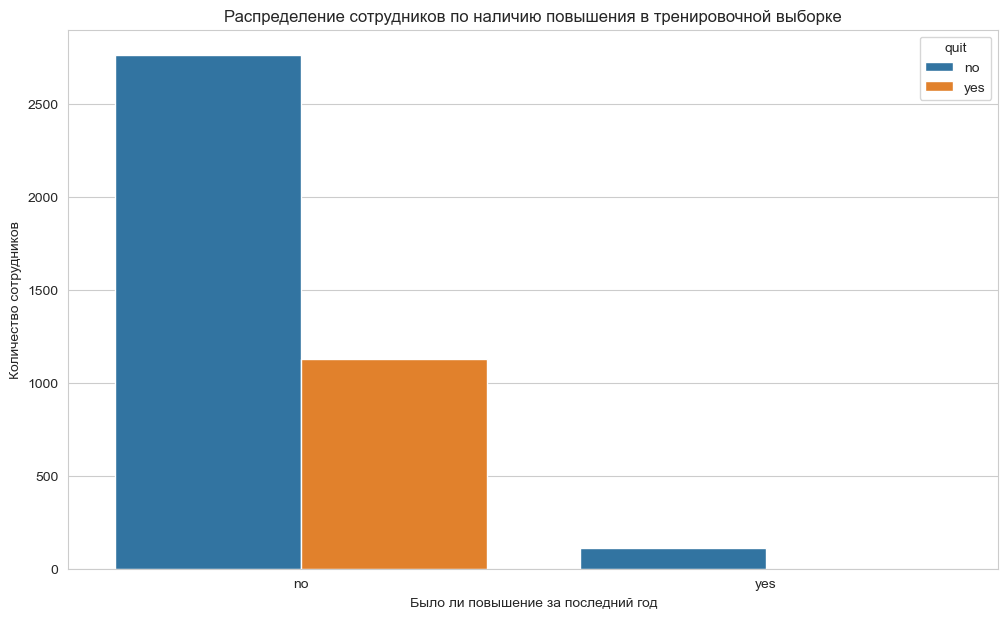

In [118]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'last_year_promo', hue='quit')
plt.title('Распределение сотрудников по наличию повышения в тренировочной выборке')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

Среди уволившихся сотрудников не было повышений за последний год. Так, возможно, увольняются сотрудники, которые ожидают повышения после 1-3 лет работы, но не получают его. 

In [119]:
train_quit.loc[train_quit['quit']== 'yes', 'last_year_violations'].value_counts(1).round(2)

last_year_violations
no     0.8
yes    0.2
Name: proportion, dtype: float64

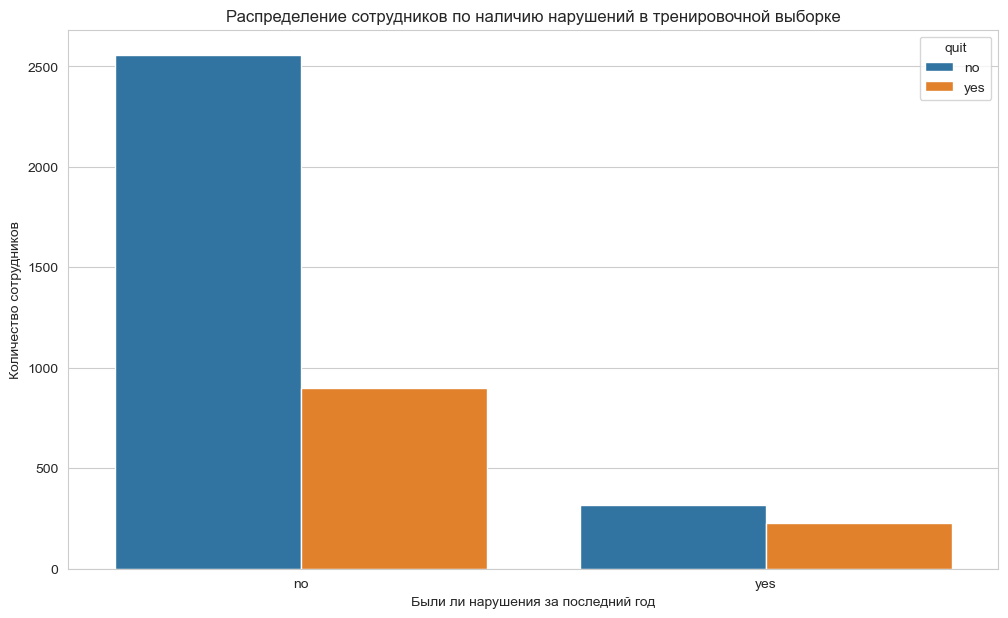

In [120]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'last_year_violations', hue='quit')
plt.title('Распределение сотрудников по наличию нарушений в тренировочной выборке')
a.set_xlabel('Были ли нарушения за последний год')
a.set_ylabel('Количество сотрудников');

In [121]:
for last_year_violations in ['yes', 'no']:
    quit_count = train_quit.loc[(train_quit['last_year_violations']==last_year_violations) & (train_quit['quit']=='yes'), 'last_year_violations'].count()
    dept_count = train_quit.loc[train_quit['last_year_violations']==last_year_violations, 'last_year_violations'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся c нарушением {last_year_violations} относительно общего числа сотрудников с таким же статусом: {per_cent.round(2)}')

Процент уволившихся c нарушением yes относительно общего числа сотрудников с таким же статусом: 41.83
Процент уволившихся c нарушением no относительно общего числа сотрудников с таким же статусом: 26.05


Среди уволившихся относительно общей тренировочной выборки больше нарушителей трудового договора, процент увеличился с 14 до 20%. Среди всех нарушителей уволилось около 40%.

In [122]:
train_quit.loc[train_quit['quit']== 'yes', 'supervisor_evaluation'].value_counts(1).round(2)

supervisor_evaluation
3    0.46
4    0.25
2    0.15
1    0.08
5    0.05
Name: proportion, dtype: float64

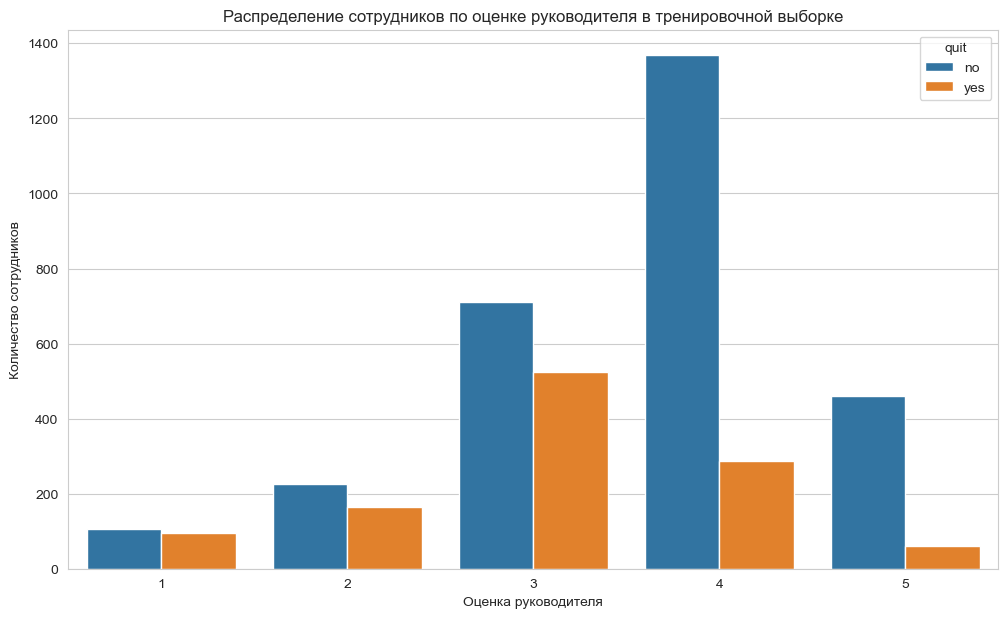

In [123]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = train_quit, x = 'supervisor_evaluation', hue='quit')
plt.title('Распределение сотрудников по оценке руководителя в тренировочной выборке')
a.set_xlabel('Оценка руководителя')
a.set_ylabel('Количество сотрудников');

In [124]:
for supervisor_evaluation in range(1, 6):
    quit_count = train_quit.loc[(train_quit['supervisor_evaluation']==supervisor_evaluation) & (train_quit['quit']=='yes'), 'supervisor_evaluation'].count()
    dept_count = train_quit.loc[train_quit['supervisor_evaluation']==supervisor_evaluation, 'supervisor_evaluation'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся с оценкой {supervisor_evaluation} относительно общего числа сотрудников с такой же оценкой: {per_cent.round(2)}')

Процент уволившихся с оценкой 1 относительно общего числа сотрудников с такой же оценкой: 47.03
Процент уволившихся с оценкой 2 относительно общего числа сотрудников с такой же оценкой: 41.94
Процент уволившихся с оценкой 3 относительно общего числа сотрудников с такой же оценкой: 42.42
Процент уволившихся с оценкой 4 относительно общего числа сотрудников с такой же оценкой: 17.29
Процент уволившихся с оценкой 5 относительно общего числа сотрудников с такой же оценкой: 11.54


Соотношение относительно общей выборке изменилось. Среди уволившихся больше cотрудников, чья работа оценивалась на 3, только 5% оценок отлично - это наименее популярный результат. Около половины сотрудников с оценкой 1 увольнялись, около 40% с оценкой 2 и 3 также увольнялись. Возможно, эти увольнения были мотивированы со стороны работодателя в связи с качеством работы. 

**Портрет уволившегося сотрудника:**
- Средняя заработная плата около 23 тысяч, зарплата абсолютного большинства уволившихся сотрудников была до 40 тысяч
- Больше всего увольнений относительно числа сотрудников отдела в техотделе (30%), меньше всего - в отделе кадров (25%).
- Больше всего уволившихся сотрудников с маленькой нагрузкой.
- Около половины сотрудников джунов увольняются из компании, среди всех уволившихся 90% сотрудников занимают именно этот уровень должности.
- 96% уволившихся работают 1-3 года, в основном увольняются сотрудники, проработавшие 1 год. Среди всех сотрудников, которые работают год 61% увольняется.
- Среди уволившихся сотрудников никого не повышали за последний год.
- У 20% уволившихся сотрудников были нарушения трудового договора за последний год.
- Оценка руководителя уволившимся сотрудникам в основном была 3, вторая по частоте - 4, наименее частая оценка - 5.
- Возможно, увольнения сотрудников с оценками 1-2 и с нарушениями трудового договора могли быть добровольно-принудительными. 

Таким образом, вероятнее всего, увольняются джуны, проработавшие где-то год в компании, получающие малую нагрузку и не получившие за последний год повышения, с зарплатой в среднем 23 тысячи. Наиболее частотны увольнения в техотделе, примерно равная доля во всех остальных отделах, кроме отдела кадров. Оценка их работы, скорее всего, равна 3 или 4. 

Рассмотрим есть ли несовпадения с тренировочной выборкой:

In [125]:
test_quit.loc[test_quit['quit']== 'yes', 'salary'].describe()

count      564.000000
mean     24955.319149
std      10650.300744
min      12000.000000
25%      18000.000000
50%      22800.000000
75%      30000.000000
max      80400.000000
Name: salary, dtype: float64

In [126]:
test_quit.loc[test_quit['quit']== 'no', 'salary'].describe()

count     1436.000000
mean     37645.403900
std      15503.475156
min      12000.000000
25%      25200.000000
50%      33600.000000
75%      48000.000000
max      96000.000000
Name: salary, dtype: float64

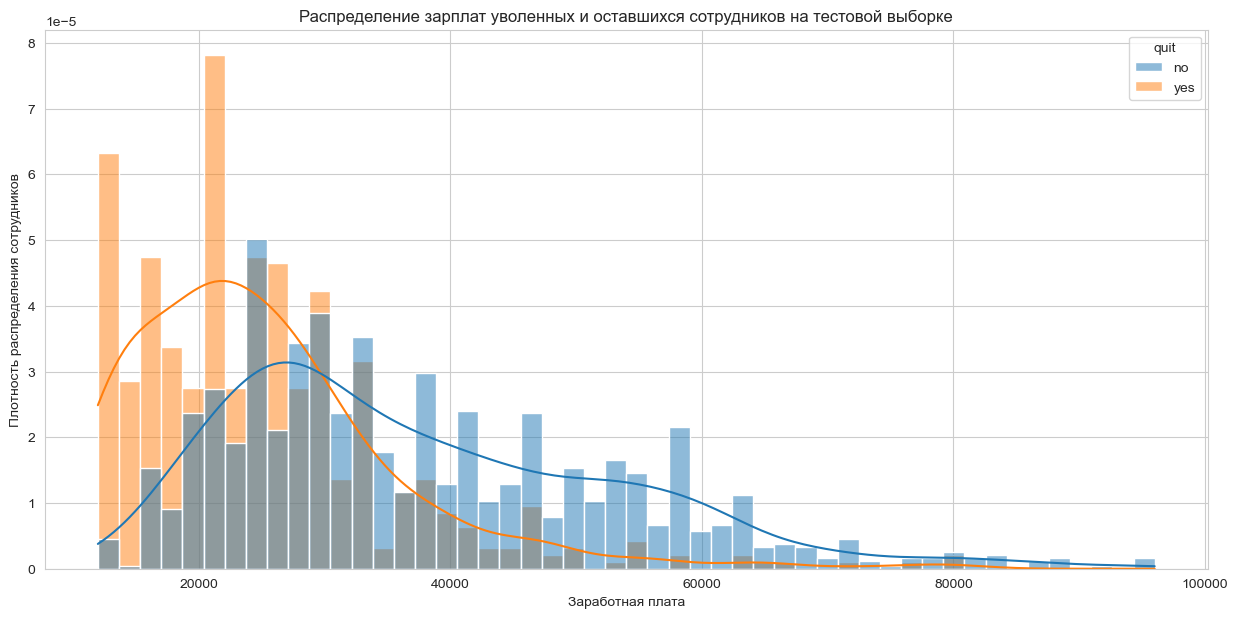

In [127]:
plt.figure(figsize=(15,7))
b = sns.histplot(data=test_quit, bins=50, kde=True, hue ='quit', x = 'salary', stat='density', common_norm=False);
plt.title('Распределение зарплат уволенных и оставшихся сотрудников на тестовой выборке')
b.set_xlabel('Заработная плата')
b.set_ylabel('Плотность распределения сотрудников');

In [128]:
test_quit.loc[test_quit['quit']== 'yes', 'dept'].value_counts(1).round(2)

dept
sales         0.40
technology    0.23
purchasing    0.14
marketing     0.12
hr            0.12
Name: proportion, dtype: float64

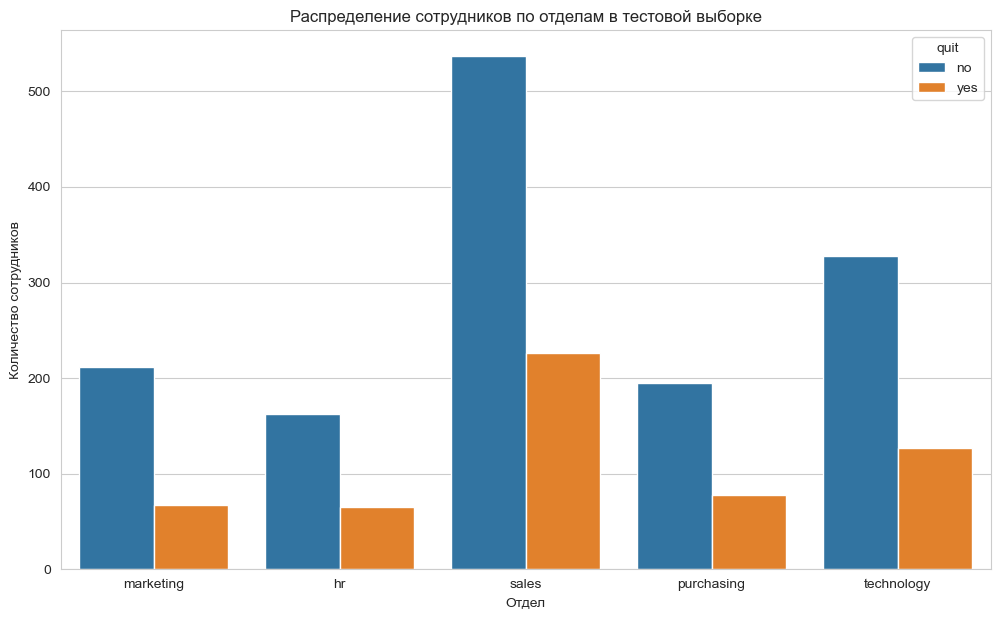

In [129]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'dept', hue='quit')
plt.title('Распределение сотрудников по отделам в тестовой выборке')
a.set_xlabel('Отдел')
a.set_ylabel('Количество сотрудников');

In [130]:
for dept in depts:
    quit_count = test_quit.loc[(test_quit['dept']==dept) & (test_quit['quit']=='yes'), 'dept'].count()
    dept_count = test_quit.loc[test_quit['dept']==dept, 'dept'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся из отдела {dept} относительно общего числа сотрудников в отделе: {per_cent.round(2)}')

Процент уволившихся из отдела sales относительно общего числа сотрудников в отделе: 29.62
Процент уволившихся из отдела purchasing относительно общего числа сотрудников в отделе: 28.57
Процент уволившихся из отдела marketing относительно общего числа сотрудников в отделе: 24.01
Процент уволившихся из отдела technology относительно общего числа сотрудников в отделе: 27.91
Процент уволившихся из отдела hr относительно общего числа сотрудников в отделе: 28.63


In [131]:
test_quit.loc[test_quit['quit']== 'yes', 'workload'].value_counts(1).round(2)

workload
medium    0.45
low       0.42
high      0.13
Name: proportion, dtype: float64

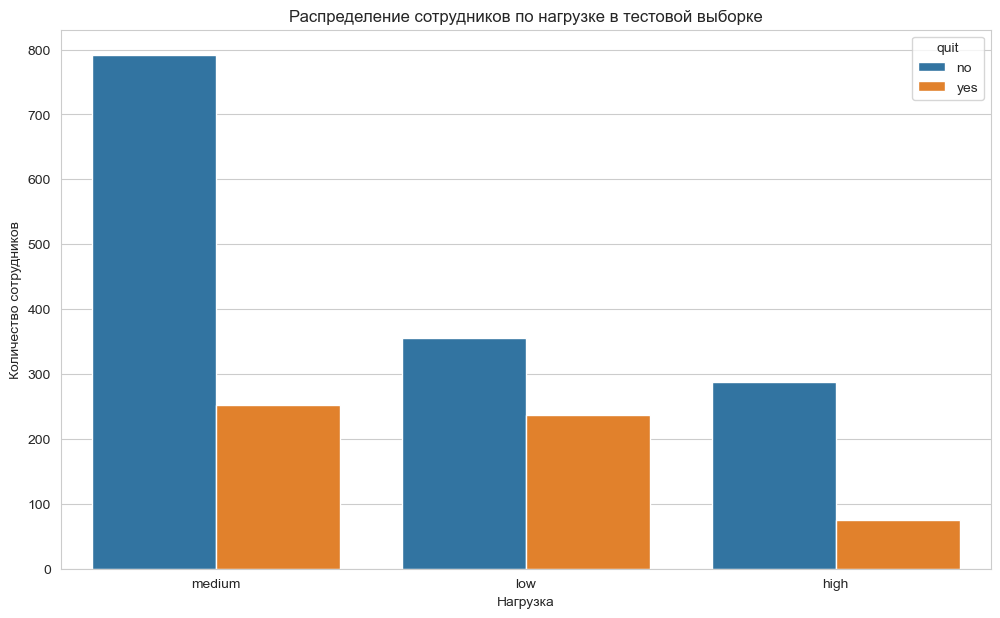

In [132]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'workload', hue='quit')
plt.title('Распределение сотрудников по нагрузке в тестовой выборке')
a.set_xlabel('Нагрузка')
a.set_ylabel('Количество сотрудников');

In [133]:
for workload in workloads:
    quit_count = test_quit.loc[(test_quit['workload']==workload) & (test_quit['quit']=='yes'), 'workload'].count()
    dept_count = test_quit.loc[test_quit['workload']==workload, 'workload'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся с нагрузкой {workload} относительно общего числа сотрудников с такой нагрузкой: {per_cent.round(2)}')

Процент уволившихся с нагрузкой low относительно общего числа сотрудников с такой нагрузкой: 39.97
Процент уволившихся с нагрузкой medium относительно общего числа сотрудников с такой нагрузкой: 24.16
Процент уволившихся с нагрузкой high относительно общего числа сотрудников с такой нагрузкой: 20.66


In [134]:
test_quit.loc[test_quit['quit']== 'yes', 'level'].value_counts(1).round(2)

level
junior    0.87
middle    0.11
sinior    0.02
Name: proportion, dtype: float64

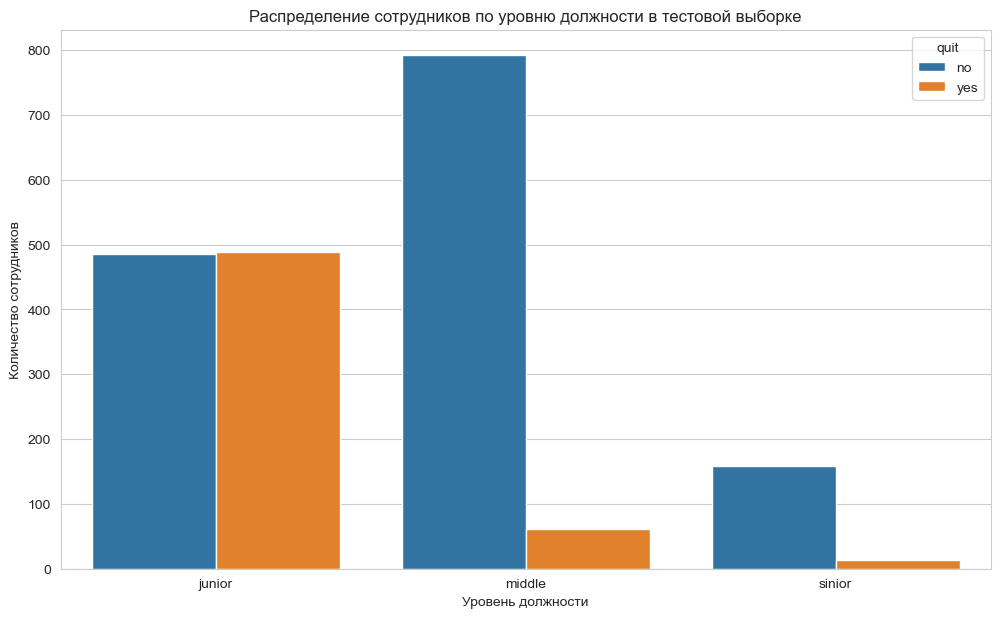

In [135]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'level', hue='quit')
plt.title('Распределение сотрудников по уровню должности в тестовой выборке')
a.set_xlabel('Уровень должности')
a.set_ylabel('Количество сотрудников');

In [136]:
for level in levels:
    quit_count = test_quit.loc[(test_quit['level']==level) & (test_quit['quit']=='yes'), 'level'].count()
    dept_count = test_quit.loc[test_quit['level']==level, 'level'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся с уровнем должности {level} относительно общего числа сотрудников с таким же уровнем: {per_cent.round(2)}')

Процент уволившихся с уровнем должности junior относительно общего числа сотрудников с таким же уровнем: 50.1
Процент уволившихся с уровнем должности middle относительно общего числа сотрудников с таким же уровнем: 7.26
Процент уволившихся с уровнем должности sinior относительно общего числа сотрудников с таким же уровнем: 7.6


In [137]:
test_quit.loc[train_quit['quit']== 'yes', 'employment_years'].value_counts(1).round(2)

employment_years
1     0.29
2     0.20
3     0.10
4     0.10
5     0.08
7     0.07
6     0.07
8     0.05
9     0.03
10    0.02
Name: proportion, dtype: float64

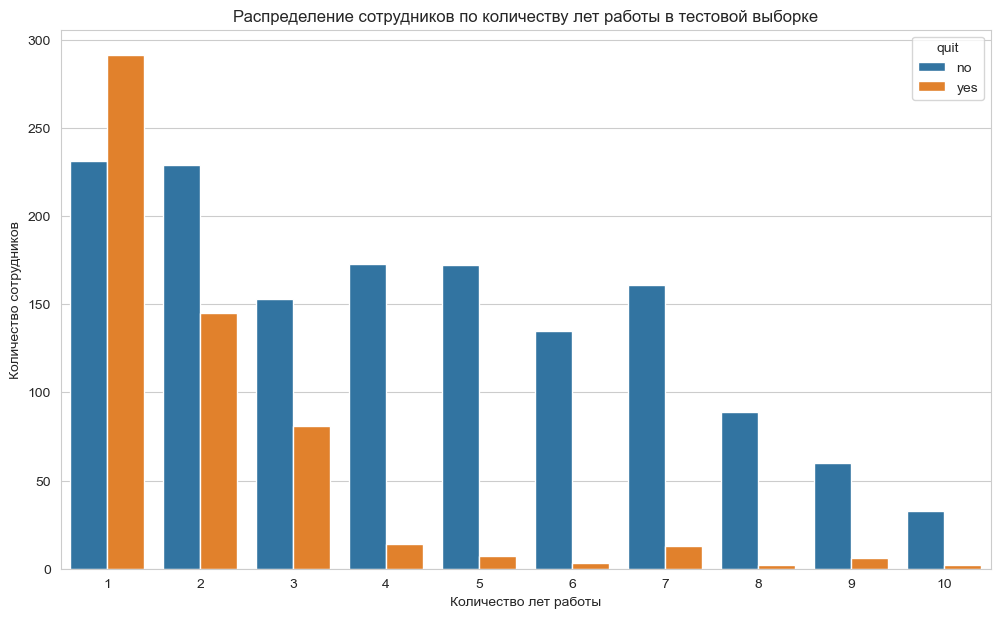

In [138]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'employment_years', hue='quit')
plt.title('Распределение сотрудников по количеству лет работы в тестовой выборке')
a.set_xlabel('Количество лет работы')
a.set_ylabel('Количество сотрудников');

In [139]:
for employment_year in range(1, 11):
    quit_count = test_quit.loc[(test_quit['employment_years']==employment_year) & (test_quit['quit']=='yes'), 'employment_years'].count()
    dept_count = test_quit.loc[test_quit['employment_years']==employment_year, 'employment_years'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся, проработавших {employment_year} лет относительно общего числа сотрудников с таким же стажем: {per_cent.round(2)}')

Процент уволившихся, проработавших 1 лет относительно общего числа сотрудников с таким же стажем: 55.75
Процент уволившихся, проработавших 2 лет относительно общего числа сотрудников с таким же стажем: 38.77
Процент уволившихся, проработавших 3 лет относительно общего числа сотрудников с таким же стажем: 34.62
Процент уволившихся, проработавших 4 лет относительно общего числа сотрудников с таким же стажем: 7.49
Процент уволившихся, проработавших 5 лет относительно общего числа сотрудников с таким же стажем: 3.91
Процент уволившихся, проработавших 6 лет относительно общего числа сотрудников с таким же стажем: 2.17
Процент уволившихся, проработавших 7 лет относительно общего числа сотрудников с таким же стажем: 7.47
Процент уволившихся, проработавших 8 лет относительно общего числа сотрудников с таким же стажем: 2.2
Процент уволившихся, проработавших 9 лет относительно общего числа сотрудников с таким же стажем: 9.09
Процент уволившихся, проработавших 10 лет относительно общего числа сот

In [140]:
test_quit.loc[test_quit['quit']== 'yes', 'last_year_promo'].value_counts(1).round(2)

last_year_promo
no     0.99
yes    0.01
Name: proportion, dtype: float64

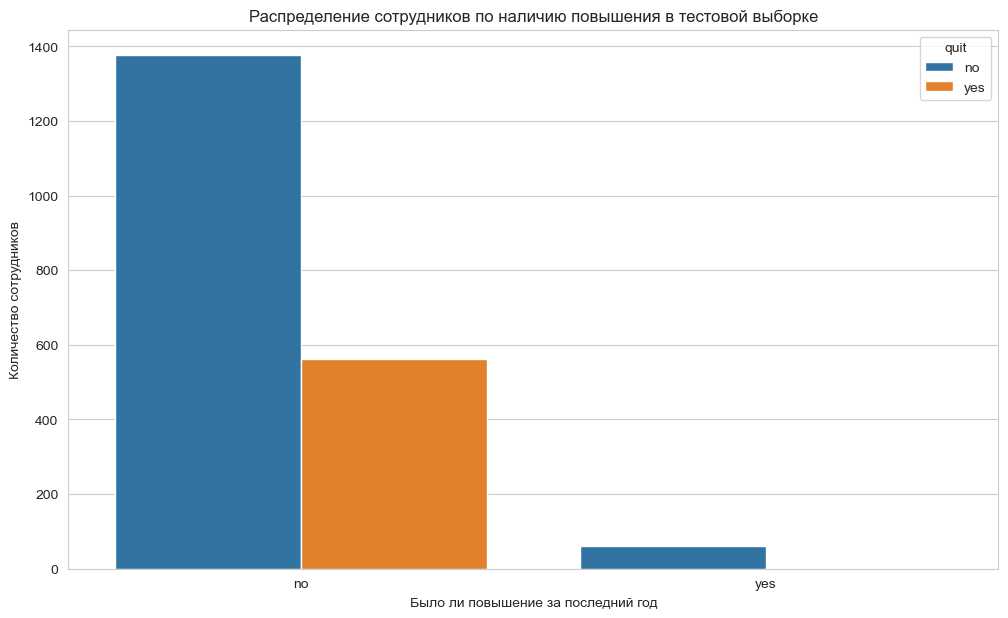

In [141]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'last_year_promo', hue='quit')
plt.title('Распределение сотрудников по наличию повышения в тестовой выборке')
a.set_xlabel('Было ли повышение за последний год')
a.set_ylabel('Количество сотрудников');

In [142]:
test_quit.loc[test_quit['quit']== 'yes', 'last_year_violations'].value_counts(1).round(2)

last_year_violations
no     0.81
yes    0.19
Name: proportion, dtype: float64

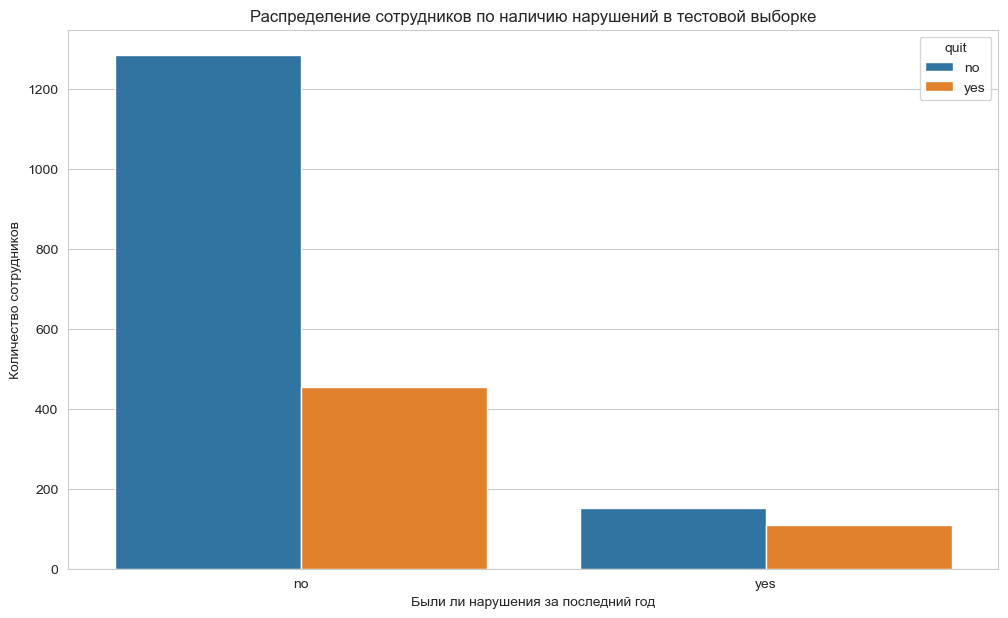

In [143]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'last_year_violations', hue='quit')
plt.title('Распределение сотрудников по наличию нарушений в тестовой выборке')
a.set_xlabel('Были ли нарушения за последний год')
a.set_ylabel('Количество сотрудников');

In [144]:
for last_year_violations in ['yes', 'no']:
    quit_count = test_quit.loc[(test_quit['last_year_violations']==last_year_violations) & (test_quit['quit']=='yes'), 'last_year_violations'].count()
    dept_count = test_quit.loc[test_quit['last_year_violations']==last_year_violations, 'last_year_violations'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся c нарушением {last_year_violations} относительно общего числа сотрудников с таким же статусом: {per_cent.round(2)}')

Процент уволившихся c нарушением yes относительно общего числа сотрудников с таким же статусом: 41.6
Процент уволившихся c нарушением no относительно общего числа сотрудников с таким же статусом: 26.18


In [145]:
test_quit.loc[train_quit['quit']== 'yes', 'supervisor_evaluation'].value_counts(1).round(2)

supervisor_evaluation
4    0.42
3    0.30
5    0.16
2    0.09
1    0.04
Name: proportion, dtype: float64

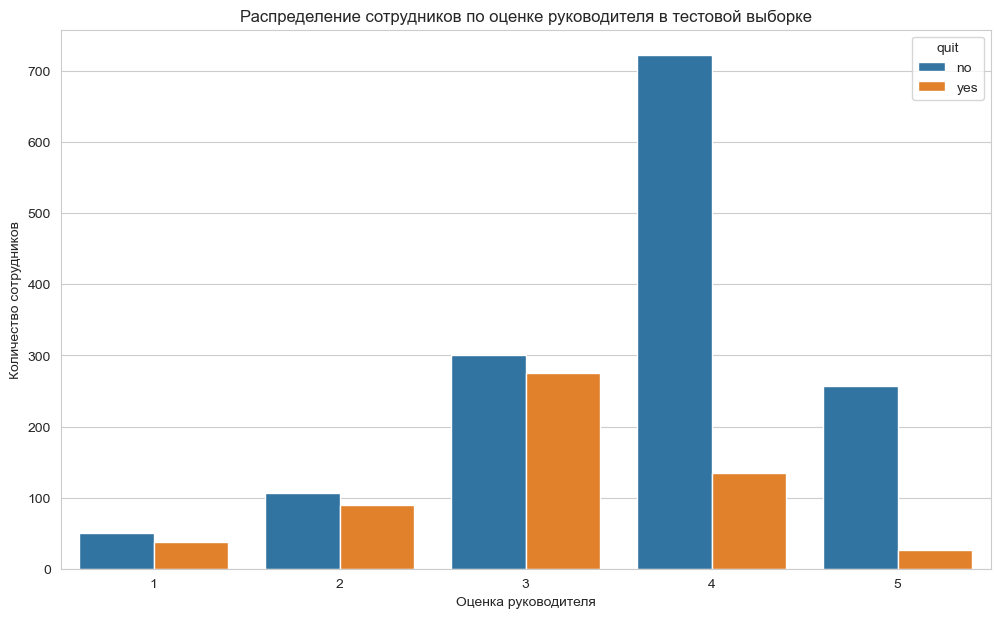

In [146]:
plt.figure(figsize=(12,7))
a = sns.countplot(data = test_quit, x = 'supervisor_evaluation', hue='quit')
plt.title('Распределение сотрудников по оценке руководителя в тестовой выборке')
a.set_xlabel('Оценка руководителя')
a.set_ylabel('Количество сотрудников');

In [147]:
for supervisor_evaluation in range(1, 6):
    quit_count = test_quit.loc[(test_quit['supervisor_evaluation']==supervisor_evaluation) & (test_quit['quit']=='yes'), 'supervisor_evaluation'].count()
    dept_count = test_quit.loc[test_quit['supervisor_evaluation']==supervisor_evaluation, 'supervisor_evaluation'].count()
    per_cent = (quit_count / dept_count) *100
    print(f'Процент уволившихся с оценкой {supervisor_evaluation} относительно общего числа сотрудников с такой же оценкой: {per_cent.round(2)}')

Процент уволившихся с оценкой 1 относительно общего числа сотрудников с такой же оценкой: 43.18
Процент уволившихся с оценкой 2 относительно общего числа сотрудников с такой же оценкой: 45.41
Процент уволившихся с оценкой 3 относительно общего числа сотрудников с такой же оценкой: 47.83
Процент уволившихся с оценкой 4 относительно общего числа сотрудников с такой же оценкой: 15.75
Процент уволившихся с оценкой 5 относительно общего числа сотрудников с такой же оценкой: 9.51


**Отличия тестовой от тренировочной выборки:**
1. Среди зп уволившихся есть большие значения - максимум достигает 80 тысяч, поэтому среднее значение на пару тясяч больше, хотя медиана остается такой же.
2. Процент уволившихся относительно числа сотрудников отдела отличается, теперь по увольнениям лидируют отдел продаж и кадров,  наименьший процент у отдела маркетинга.
3. Среди уволившихся только половина проработала 1-3 года, остальные уволившиеся распределены равномерно по остальным годам, проработанным в компании. Чаще встречаются увольнения и среди проработавших более 7 лет.  
4. Распрделение уволившихся по оценкам руководителя соответствует общей тестовой выборке и отличается от уволившихся в тренировочной - здесь вновь преобладают сотрудники с оценкой 4, а за ними следуют те, что с оценкой 3. Среди уволившихся 16% сотрудников с отличной оценкой.

Таким образом, несовпадения по распределению могут быть в таких признаках как оценка руководителя, количество лет в компании, отдел. 

### Добавлние нового входного признака

In [148]:
train_quit['job_satisfaction_rate'] = grid_search.predict(train_quit)
train_quit

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.612500
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.826111
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.386000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.341111
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.812500
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.525385
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.836000
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.625000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.515714


In [149]:
test_feat['job_satisfaction_rate'] = grid_search.predict(test_feat)
test_feat

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,id,job_satisfaction_rate
0,marketing,junior,medium,2,no,no,5,28800,485046,0.868571
1,hr,junior,medium,1,no,no,4,30000,686555,0.681429
2,sales,middle,low,5,no,no,4,19200,467458,0.728571
3,sales,middle,low,6,no,no,4,19200,418655,0.692000
4,hr,middle,medium,5,no,no,5,40800,789145,0.825556
...,...,...,...,...,...,...,...,...,...,...
1995,marketing,junior,low,3,no,no,3,20400,393147,0.414000
1996,technology,middle,low,3,no,no,2,21600,109582,0.414000
1997,technology,junior,low,1,no,no,3,14400,305653,0.200000
1998,technology,middle,low,8,no,no,1,32400,160233,0.518571


In [150]:
test_quit['job_satisfaction_rate'] = test_feat['job_satisfaction_rate']
test_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,id,job_satisfaction_rate
0,marketing,junior,medium,2,no,no,5,28800,no,485046,0.868571
1,hr,junior,medium,1,no,no,4,30000,no,686555,0.681429
2,sales,middle,low,5,no,no,4,19200,no,467458,0.728571
3,sales,middle,low,6,no,no,4,19200,no,418655,0.692000
4,hr,middle,medium,5,no,no,5,40800,no,789145,0.825556
...,...,...,...,...,...,...,...,...,...,...,...
1995,marketing,junior,low,3,no,no,3,20400,yes,393147,0.414000
1996,technology,middle,low,3,no,no,2,21600,yes,109582,0.414000
1997,technology,junior,low,1,no,no,3,14400,yes,305653,0.200000
1998,technology,middle,low,8,no,no,1,32400,no,160233,0.518571


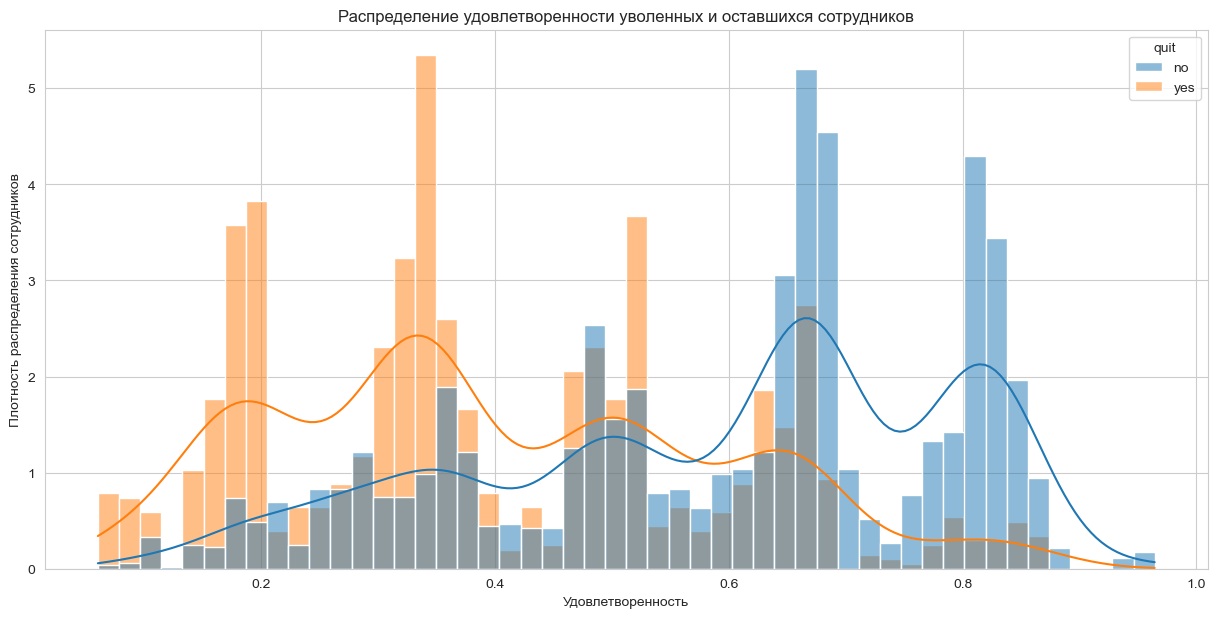

In [151]:
plt.figure(figsize=(15,7))
b = sns.histplot(data=train_quit, bins=50, kde=True, hue ='quit', x = 'job_satisfaction_rate', stat='density', common_norm=False);
plt.title('Распределение удовлетворенности уволенных и оставшихся сотрудников')
b.set_xlabel('Удовлетворенность')
b.set_ylabel('Плотность распределения сотрудников');

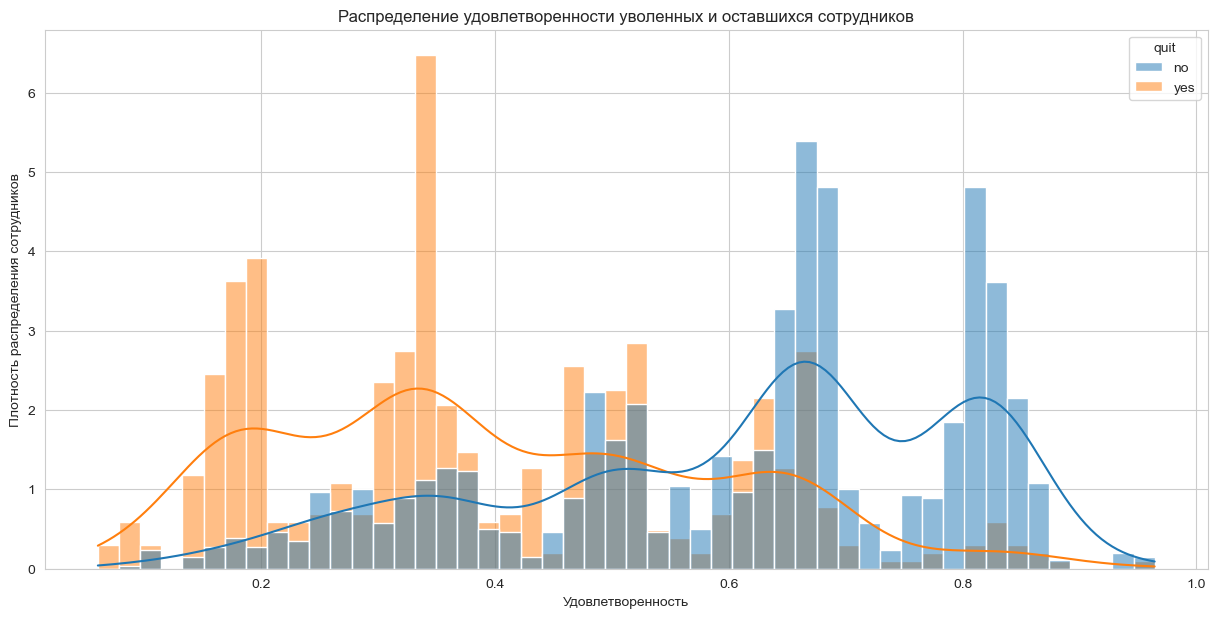

In [152]:
plt.figure(figsize=(15,7))
b = sns.histplot(data=test_quit, bins=50, kde=True, hue ='quit', x = 'job_satisfaction_rate', stat='density', common_norm=False);
plt.title('Распределение удовлетворенности уволенных и оставшихся сотрудников')
b.set_xlabel('Удовлетворенность')
b.set_ylabel('Плотность распределения сотрудников');

In [153]:
print(test_quit.loc[test_quit['quit']=='yes', 'job_satisfaction_rate'].mean().round(2))
test_quit.loc[test_quit['quit']=='no', 'job_satisfaction_rate'].mean().round(2)

0.4


0.61

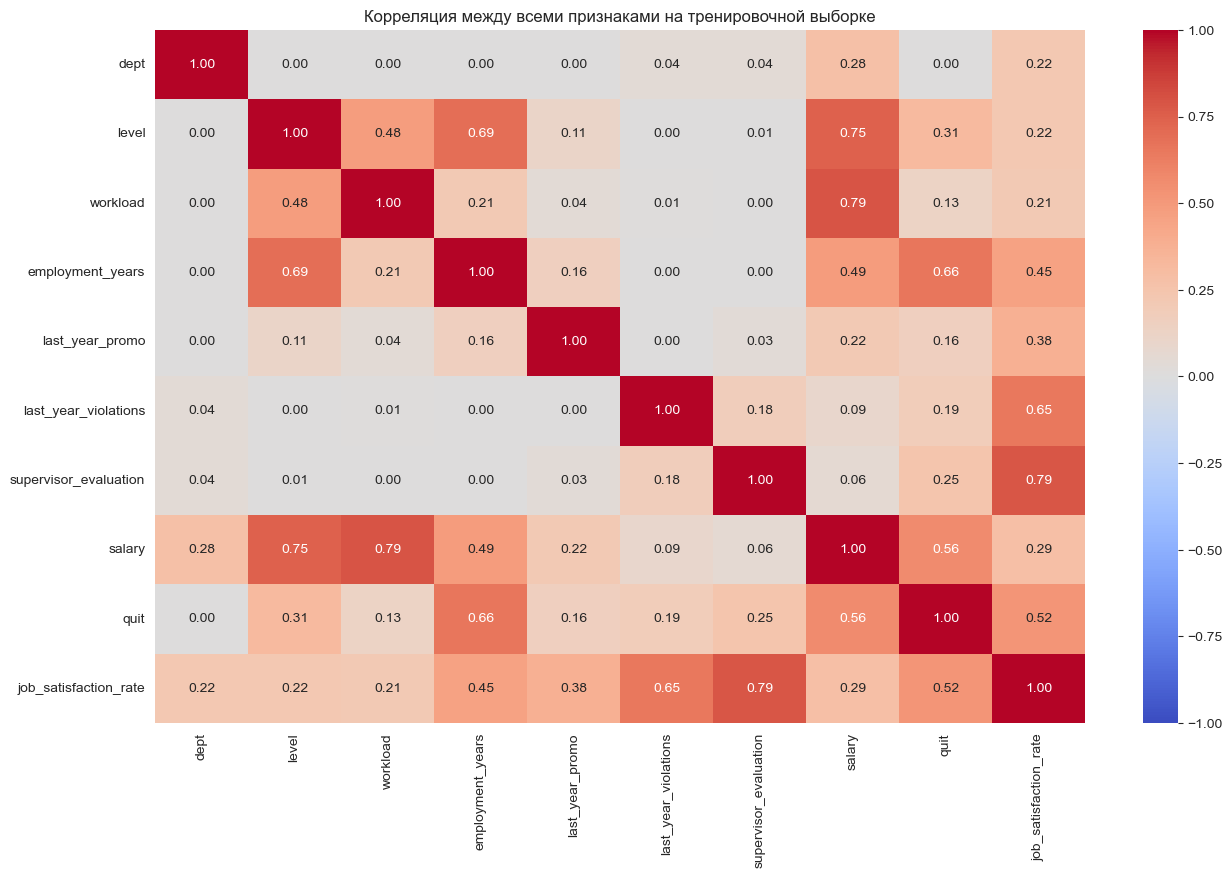

In [154]:
corr_phik = train_quit.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(15, 9))
sns.heatmap(corr_phik, annot=True, cmap='coolwarm', vmin=-1, fmt='.2f')
plt.title('Корреляция между всеми признаками на тренировочной выборке')
plt.show()

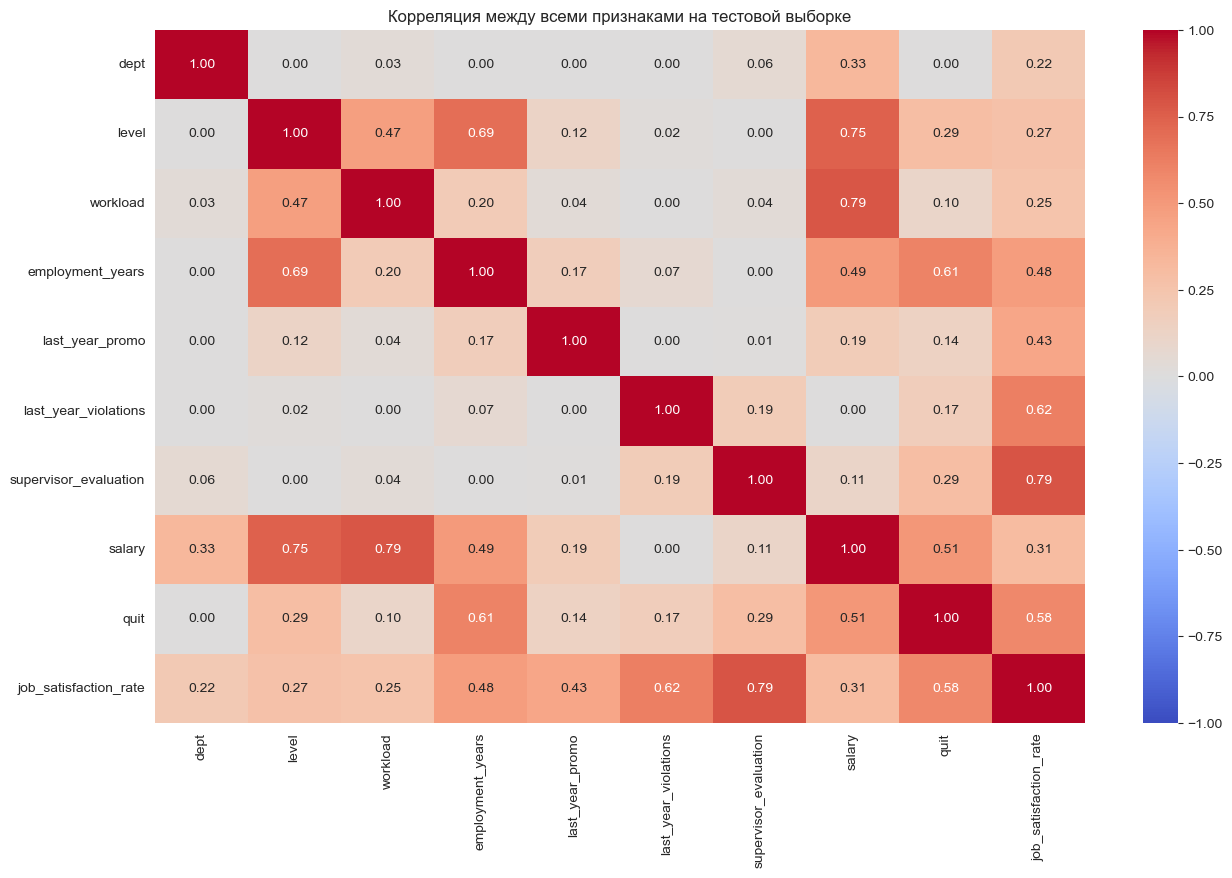

In [155]:
corr_phik = test_quit.drop('id', axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(15, 9))
sns.heatmap(corr_phik, annot=True, cmap='coolwarm', vmin=-1, fmt='.2f')
plt.title('Корреляция между всеми признаками на тестовой выборке')
plt.show()

**Выводы:**
- На тренировочной и тестовой выборках видна взаимосвязь между признаками удовлетворенности работой и увольнением, среднее значение удовлтворенности уволившегося равно 0.4, тогда как у оставшихся данный показатель равен 0.61.
- Были выявлена корреляция между целевым признаком quit и следующими входящими признаками:
    - удовлетворенность
    - количество лет в компании
    -  зарплата
    -  меньшая корреляция есть с признаками уровень должности и оценка руководителя

Данные признаки соответствуют выделенным нами особенностям портрета уволившегося на этапе исследовательского анализа. 

### Подготовка данных и выбор лучшей модели

In [156]:
RANDOM_STATE = 58
X_train = train_quit.drop(['id', 'quit'], axis=1)
y_train = train_quit['quit']
X_test = test_feat.drop('id', axis=1)
y_test = y_test_quit['quit']


ohe_col = ['dept', 'last_year_promo', 'last_year_violations']
ord_col = ['level', 'workload']
num_col = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [157]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [158]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop="first", handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [159]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_bef',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder( 
                categories=
                           [
                               ['junior	', 'middle', 'sinior'],
                               ['low', 'medium', 'high']
                           ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )), 
        (
            'simpleImputer_aft',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [160]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', MinMaxScaler(), num_col)
    ],
    remainder='passthrough'
)

In [161]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif)),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [162]:
param_grid = [
    {
        'feature_selection__k': [8, 10, 'all'],
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(10, 25),
        'models__max_features': range(5, 16),
        'models__min_samples_leaf': range(5, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'feature_selection__k': [ 9, 'all'],
        'models':[LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }, 
      {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
      }, 
    {
        'feature_selection__k': [9, 10, 'all'],
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [10, 25, 50, 100],
        'models__max_depth': [10, 15, 20, 25, 30, 35, 40, 45],
        'models__max_features': range(5, 20),
        'models__min_samples_leaf': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [163]:
random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring='roc_auc'
)

In [164]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                               'passthrough']},
                                        {'feature_selection__k': [9, 10, 'all'],
                                         'models': [RandomForestClassifier(random_state=58)],
                                         'models__max_depth': [10, 15, 20, 25,
                                                               30, 35, 40, 45],
                                         'models__max_features': range(5, 20),
                                         'models__min_samples_leaf': range(2, 15),
                                         'models__n_estimators': [10, 25, 50,
                                                                  100],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   scoring='roc_auc')

In [165]:
print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', random_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [166]:
y_proba = random_search.predict_proba(X_test)
print(f'Метрика ROC-AUC: {round(roc_auc_score(y_test, y_proba[:,1]), 2)}')

Метрика ROC-AUC: 0.93


**Вывод:**
- Лучшая модель была подобрана RandomForestClassifier со следующими параметрами:
    -  max_depth=20, max_features=5,
    -  min_samples_leaf=10,
    -  n_estimators=25,
    -  random_state=58
    -  StandardScaler()
- Значение метрики ROC-AUC на тестовой равно 0.93

### Итоговый вывод

**Задача:**

1. Для HR-аналитиков компании «Работа с заботой» в связи с целью избежать финансовые потери, оттока сотрудников и неожиданных увольнений появилась задача предсказывать удовлетворннность сотрудников и вероятность их увольнения. Для решения данной задачи были подобраны две модели, соответствующие запрашиваемым результатам метрик. 

**Предобработка данных**

2. Данные были получены сразу разделенные на тренировочные и тестовые датасеты (отдельно входные признаки и целевой). В датасетах было обнаружено незначительное число явных и неявных пропусков, которые были обработаны в пайплайне на этапе подготовки данных. Явных дубликотов не было, типы данных и названия столбцов были в норме. Поскольку тестовые данные были сразу разделены на целевой и входные признаки и порядок строк по id у них не совпадал, необходимо было их соотнести по id для верности расчета метрики.

**Исследовательский анализ первой задачи показал, что**

3. Удовлетворение наибольшего числа сотрудников находится в диапазрен 0.6-0.8, то есть сотрудники в основном удовлетворены работой, хотя улучшение для многих возможно. У большинства сотрудников зарпата до 50 тысяч, и только ограниченное число сотрудников получает более повышенную. Наиболее высокие зп в среднем у техотдела. Около 60% сотрудников из отдела продаж или техотдела. Меньше всего в компании синьоров (10%), примерно равное процентное соотношение между мидлами и джунами с перевесом в сторону последних. Наиболее загруженные среди сотрудников - миддлы, среди наименее загруженных преобладают джуны. Примерно у половины сотрудников средняя загруженность. Большинство сотрудников работает в компании до 4 лет, совсем небольшое число сотрудников больше 7 лет. За последний год было повышено только 3% сотрудников, среди джунов не было повышений. Примерно у 15% сотрудников были нарушения трудового договора. Руководители в основном оценивают работу сотрудников на 4 или 3.
4. На удовлетворенность больше всего влияет довольство руководство своим сотрудником или справедливое оценивание его работы, то есть признак оценка руководителя. Также существует средняя корреляция с признаком наличие нарушений трудового договора и меньшая корреляция с признаками повышения за последний год и количеством проработанных лет. На удивление совсем маленькая корреляция с зарплатой. Зарплата зависит от нагрузки, уровня должности и в какой-то степени от количества проработанных лет в компании.

**Построение первой модели**

5.  После исследования цлевого и входных признаков, был создан пайплайн, который выбрал лучшую модель для решения поставленной задачи на основе метрики SMAPE, на тестовых данных был получен результат 14.6, который соответствует требованиям, параметры модели следующие:

- модель DecisionTreeRegressor
- max_depth=16,
- max_features=10,
- min_samples_leaf=5,
- random_state=44
- SelectKBest, k='all'
- масштабирум при помощи RobustScaler()

**Исследовательский анализ второй задачи**

6. *Портрет уволившегося сотрудника:* вероятнее всего, увольняются джуны, проработавшие 1-3 года в компании, получающие малую нагрузку и не получившие за последний год повышения. Средняя зарплата уволившегося равна 23-25 тысячам. Увольнения по отделам распределены примерно равномерно. Оценка руководитеоя уволившемуся чаще всего 3 или 4, но это может быть в силу частотности данных значений в общей выборке.
7. Корреляция существует между целевым признаком увольнения и следующими входными: удовлетворенность работой, количество лет в компании, зарплата, а также меньшая корреляция есть с признаками уровень должности и оценка руководителя

**Построение второй модели**

8. Лучшей моделью была выбрана RandomForestClassifier со следующими параметрами:
- max_depth=20, max_features=5,
- min_samples_leaf=10,
- n_estimators=25,
- random_state=58
- StandardScaler()
Значение метрики ROC-AUC на тестовой выборке показало 0.93, что соответствует требованиям компании.

**Рекомендации:**

9. Наибольшее число уволившихся сотрудников те, что проработали небольшое количество лет и не совсем удовлетворительно оцениваются руководителем. Возможно, компании стоит разработать новую систему мотивации новых сотрудников, проследить за улучшением взаимопонимания между руководителем и подчиненным - удовстовериться, что работа справедливо оценивается, а критика является эффективной и конструктивной, что руководитель не перегружен непосильным числом задач и проследить, чтобы джуны не оставались без работы, то есть получали достаточно возможностей для развития при возможном освобождении от нагрузки миддов и синьоров. 